In [1]:
from orphics.stats import FisherMatrix
from orphics.stats import corner_plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import camb

In [3]:
from nbodykit.lab import *

In [4]:
#import MAS_library as MASL
#import Pk_library as PKL

In [5]:
#import torch
#print(torch.__version__)

In [6]:
### LCDM parameters
h=0.6774 # See README and the accompanying paper regarding the value of h. 
Om = 0.3089
Omh2=(h**2)*Om
Obh2 = 0.02203
Och2 = Omh2-Obh2
ns=0.9667
s8=0.8159
### Hu-Sawicki model parameters
fr0=1e-5
n=1

In [7]:
params = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n', r'b_1']
paramssmall = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n']
paramslittle = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})']
paramsMG = [r'\log(f_{R_0})', r'n']

In [8]:
Fisherold = np.loadtxt('./Covariance_data/FisherzY10invk03.txt')
Fisheroldhighk = np.loadtxt('./Covariance_data/FisherzY10inv.txt')
FisherY10 = np.loadtxt('./Covariance_data/FisherzY10analk03.txt')
#FishersimY10z02 = np.loadtxt('./Covariance_data/FisherHessPgg.txt')
FishersimY10z02 = np.loadtxt('./Covariance_data/Fisherhalf.txt')
FisheranalY10z02 = np.loadtxt('./Covariance_data/FisherzY10analz02.txt')
#FisherHessPgg.txt #
FisheranalY10half = np.loadtxt('./Covariance_data/FisherzY10analhalfzk025.txt')
FisherY1 = np.loadtxt('./Covariance_data/FisherzY10analk025.txt')
FisherY10k015 = np.loadtxt('./Covariance_data/FisherzY10analk015.txt')
FisherY10eff = np.loadtxt('./Covariance_data/FisherzY10analkeff.txt')
Fishersmooth = np.loadtxt('./Covariance_data/FisherzY10smoothk03.txt')
FisherHess = np.loadtxt('./Covariance_data/FisherHessz97.txt')
#FisherY1 = np.loadtxt('./Covariance_data/FisherzY1analk03.txt')
#FisherY1 = np.loadtxt('./Covariance_data/FisherzY10anal.txt')
#print (FisherY10/FisherY10eff)

In [9]:
FisheranalY10half/FisheranalY10z02

array([[18.51237675, 13.90563149, 20.31241556,         nan, 10.7098182 ,
        13.02096243],
       [13.90563149, 15.52994122, 17.35318712,         nan, 13.68136182,
        14.35458349],
       [20.31241556, 17.35318712, 22.93771758,         nan, 13.78340518,
        16.06905935],
       [        nan,         nan,         nan,         nan,         nan,
                nan],
       [10.7098182 , 13.68136182, 13.78340518,         nan, 12.32349646,
        12.66700594],
       [13.02096243, 14.35458349, 16.06905935,         nan, 12.66700594,
        13.28849646]])

In [10]:
Fishertot = FisherMatrix(FisherY10,params)
#FishertotY1 = FisherMatrix(FisherY10[0:5,0:5],paramssmall)
#FishertotY1 = FisherMatrix(FisherY10[0:4,0:4],paramslittle)
FishertotY1 = FisherMatrix(FisherY1,params)
Fishertoteff = FisherMatrix(FisherY10eff,params)
Fisherk015 = FisherMatrix(FisherY10k015,params)
Fisherbad = FisherMatrix(Fisherold,params)
Fisherbadhighk = FisherMatrix(Fisheroldhighk,params)
Fishersm = FisherMatrix(Fishersmooth,params)

Fishersimz02 = FisherMatrix(FishersimY10z02,params)
Fisheranz02 = FisherMatrix(FisheranalY10z02,params)

#fishertry = [Fishertot,FishertotY1]
fishertry = [Fishertot,FishertotY1,Fisherk015]
fishereff = [Fishertot,Fishertoteff]
fisherexamp = [Fisherbad,Fisherbadhighk]
fisherfin = [Fisherbad,Fishertot]
FisheranalY10half = FisherMatrix(FisheranalY10half, params)
Fishercomp = [Fishersimz02,FisheranalY10half]
#Fishercomp = [FisheranalY10half]

Fishernew = FisherMatrix(FisherHess,paramssmall)
Fishersmall = FisherMatrix(FisherHess[3:5,3:5],paramsMG)
Ff = [Fishernew]
Fsmall = [Fishersmall]

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/orphics/stats.py:244: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [11]:
FisherHess.shape
#Fishercomp

(5, 5)

In [12]:
Fsmall

[               \log(f_{R_0})           n
 \log(f_{R_0})    1495.080273  139.319175
 n                 139.319175   50.943787]

In [13]:
labels=[r'Y10 sample, $k_{max}<0.30$ h/Mpc',r'Y10 sample, $k_{max}<0.25$ h/Mpc',r'Y10 sample, $k_{max}<0.15$ h/Mpc']
labels2=[r'Y10 sample, $k_{max}<0.30$ h/Mpc',r'Y10 sample $V_{eff}$ h/Mpc']
labels1=['Invert 2x2 Matrix']#,r'Y1 sample, $k_{max}<1$ h/Mpc']
labelsFull=['Invert Full Matrix']
labelsexamp=[r'Y10, with simulated Covariance, $k_{max}<0.30$ h/Mpc',r'Y10, with simulated Covariance, $k_{max}<1.0$ h/Mpc']#,r'Y1 sample, $k_{max}<1$ h/Mpc']
labelscomp=[r'Y10, with simulated Covariance, $k_{max}<0.30$ h/Mpc',r'Y10, with analytical Covariance, $k_{max}<0.30$ h/Mpc']
#labelspair = ['Simulation','Analytical']
#labelspair = [r'Y10 sample, z=0.2, $k_{max}<0.25$ h/Mpc']
labelspair = [r'Y10 sample, 0.2<z<0.6, $k_{max}<0.25$ h/Mpc', r'Analytical covariance, $k_{max}<0.25$ h/Mpc']
#print (FishertotY1)

In [14]:
fid_dict = {r'\Omega_m h^2' : Omh2, r'\sigma_{8}' : s8, r'n_s' : ns, r'\log(f_{R_0})': -5, r'n' : 1, r'b_1' : 0.95}
fid_dicts = {r'\Omega_m h^2' : Omh2, r'\sigma_{8}' : s8, r'n_s' : ns, r'\log(f_{R_0})': -5, r'n' : 1}
fid_MG = { r'\log(f_{R_0})': -5, r'n' : 1}

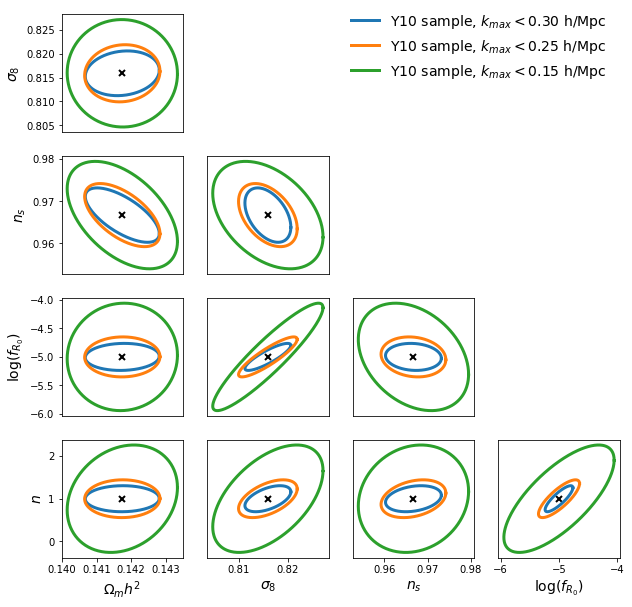

In [15]:
corner_plot(fishertry, labels, fid_dict, paramssmall, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

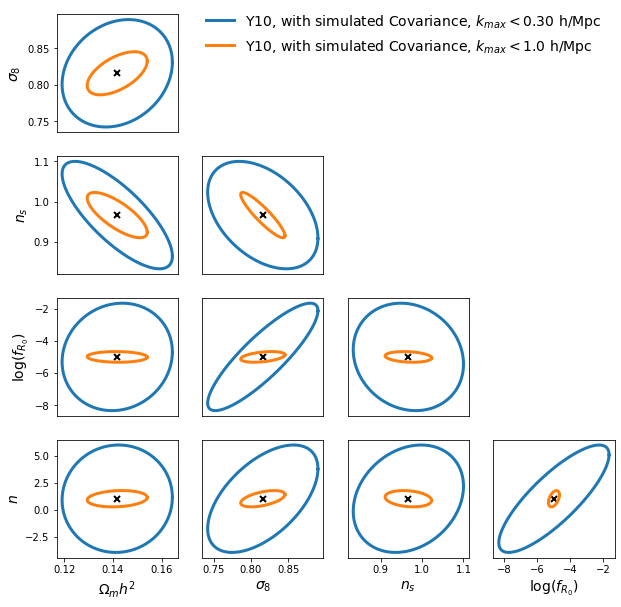

In [16]:
corner_plot(fisherexamp, labelsexamp, fid_dict, paramssmall, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

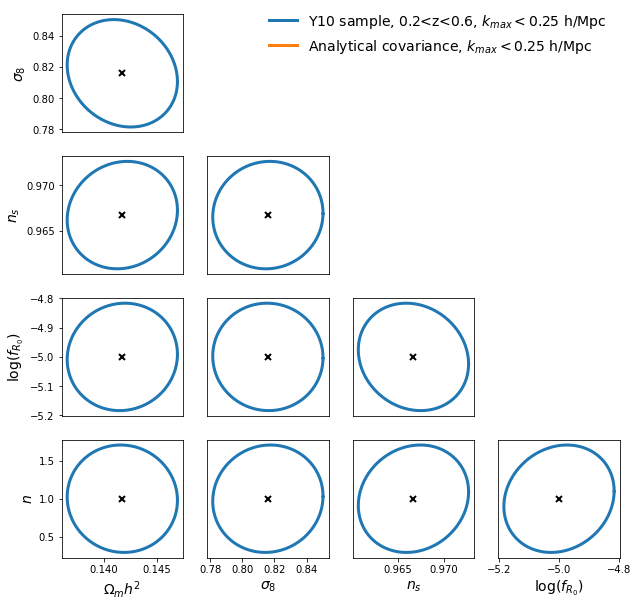

In [17]:
corner_plot(Fishercomp, labelspair, fid_dict, paramssmall, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
plt.show()
#plt.savefig('./FisherHalfY10.png')
#plt.show()

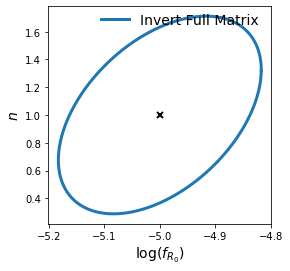

In [18]:
#plt.figure('testing', figsize=(12, 8) )
corner_plot(Ff, labelsFull, fid_dicts, paramsMG, confidence_level=0.683)
#corner_plot(Fsmall, labels1, fid_MG, paramsMG, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
#plt.savefig('./FisherInvFull.png')
#plt.figure('testing', figsize=(10, 7) )
plt.show()

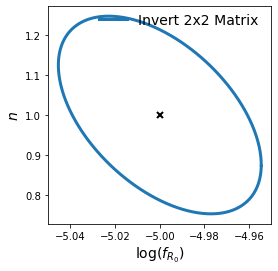

In [19]:
#corner_plot(Ff, labels1, fid_dicts, paramssmall, confidence_level=0.683)
corner_plot(Fsmall, labels1, fid_MG, paramsMG, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
#plt.savefig('./FisherInvSub.png')
plt.show()

In [20]:
#import sys
#!{sys.executable} -m pip install camb --user

In [21]:
import camb

In [22]:
#cp = camb.set_params(ns=0.96, H0=72, ombh2=0.0456*0.72*0.72, omch2=(0.26-0.0456)*0.72*0.72, w=-1.0, Alens=1.2, lmax=2000,
#                     WantTransfer=True)
#print (cp)
pars = camb.CAMBparams()
pars.WantTransfer = True
#print (pars)
Astemp = 2.689e-9
sig8 = 0.80
pars.set_cosmology(H0=70.0, ombh2=0.0456*0.70*0.70, omch2=(0.31-0.046)*0.70*0.70)
pars.InitPower.set_params(ns=0.97, As=Astemp)
results = camb.get_results(pars)
print('Temporary sigma8=', results.get_sigma8())
Asnew = Astemp*(sig8/results.get_sigma8())**2
pars.InitPower.set_params(ns=0.97, As=Asnew)
pars.set_matter_power(redshifts=[0], kmax=10)
results = camb.get_results(pars)
print('New sigma8=', results.get_sigma8())

from camb import get_matter_power_interpolator, model
PK = get_matter_power_interpolator(pars,nonlinear=False);
print('Power spectrum at z=0.5, k/h=0.1/Mpc is %s (Mpc/h)^3 '%(PK.P(0.5, 0.1)))

Temporary sigma8= [0.97273166]
New sigma8= [0.80038028]
Power spectrum at z=0.5, k/h=0.1/Mpc is 3110.23003301039 (Mpc/h)^3 


In [23]:
#print (results.get_matter_transfer_data())
trans = results.get_matter_transfer_data()
kh = trans.transfer_data[0,:,0]
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
k = kh*results.Params.h

#print (transfer)
#np.savetxt('/Users/gev866/Downloads/transfz0.txt', (np.vstack((np.log10(kh),np.log10(transfer**2*k**4)))).T, fmt = '%1.8f')
#np.savetxt('/Users/gev866/Downloads/transfz0COLA.txt', (np.vstack((np.log10(kh),np.log10(transfer**2*k**4/(200**3))))).T, fmt = '%1.8f')

In [24]:
primordial_PK = results.Params.scalar_power(k)
#print (primordial_PK/(k**(0.96-1)))

In [25]:
kk = np.logspace(-3,1,500)
#np.savetxt('/Users/gev866/Downloads/plensz0log.txt', (np.vstack((np.log10(kk),np.log10(PK.P(0.0, kk))))).T, fmt = '%1.8f')
#np.savetxt('/Users/gev866/Downloads/plensz0.txt', (np.vstack((np.log10(kk),np.log10(PK.P(0.0, kk)/np.power(kk,0.96-1.0))))).T, fmt = '%1.8f')

In [26]:
ktest, Ptest = np.loadtxt('/Users/gev866/Downloads/input_spectrum_LasDamas.dat', unpack=True)

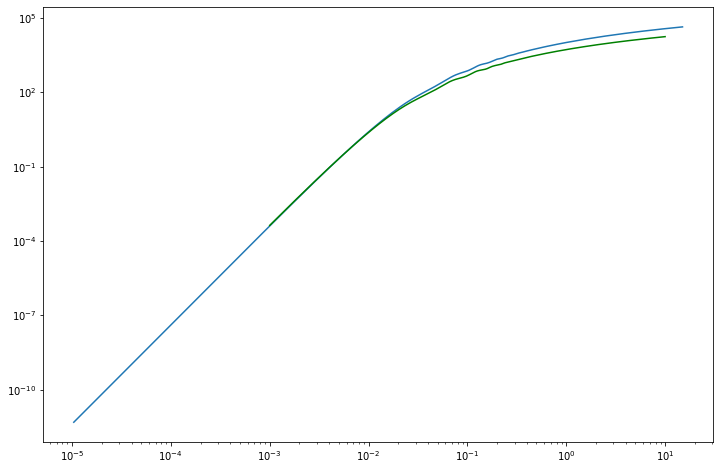

In [27]:
plt.figure('trasnf', figsize=(12, 8) )
plt.loglog(kh,transfer**2*k**4/200000)
plt.loglog(np.power(10,ktest), np.power(10,Ptest), color='g')

In [28]:
#! pip install git+https://github.com/lgarrison/asdf.git abacusutils

In [37]:
from scipy.interpolate import interp1d
fff = interp1d(kh,transfer**2*k**4, kind='cubic')

In [38]:
import math
math.pow(10,0.0000036)

1.0000082893406912

In [39]:
ktest.shape

(401,)

In [40]:
#print (fff(np.power(10,ktest[0:100]))/np.power(10,Ptest[0:100]))

In [41]:
FisherY10k03 = np.loadtxt('./Covariance_data/FisherzY10k03.txt')
Fishertotk03 = FisherMatrix(FisherY10k03,params)
fishertryY10 = [Fishertot,Fishertotk03]


/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/orphics/stats.py:244: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


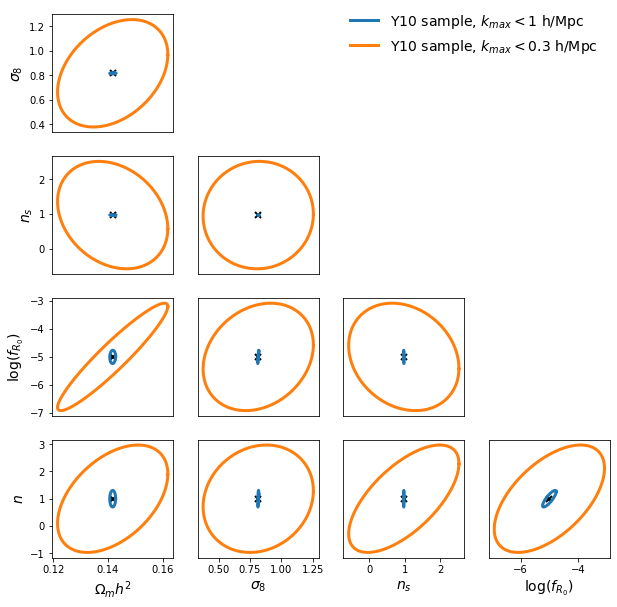

In [36]:
labelsY10 = [r'Y10 sample, $k_{max}<1$ h/Mpc',r'Y10 sample, $k_{max}<0.3$ h/Mpc']
corner_plot(fishertryY10, labelsY10, fid_dict, paramssmall, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

In [35]:
#posp = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c103_ph000/LRGs.dat')
#for i in range(Nf):
# locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c10'+str(i)+'_ph000/LRGs.dat')
for i in range(25):
 #locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c'+str(i)+'_ph000/LRGs.dat')
 #with open('/Users/gev866/Downloads/data_mocks_summit_revised/AbacusSummit_base_c'+str(i)+'_ph000/z0.500/galaxies_rsd/LRGs.dat') as f:
 if (i<10):
  with open('/Users/gev866/Downloads/data_mocks_summit_newHOD/AbacusSummit_base_c000_ph00'+str(i)+'/z0.500/galaxies_rsd/LRGs.dat') as f:   
    lines = (line for line in f if not line.startswith('#'))
    locals()['posfid'+str(i)] = np.loadtxt(lines, skiprows=1)
 else:
  with open('/Users/gev866/Downloads/data_mocks_summit_newHOD/AbacusSummit_base_c000_ph0'+str(i)+'/z0.500/galaxies_rsd/LRGs.dat') as f:  
    lines = (line for line in f if not line.startswith('#'))
    locals()['posfid'+str(i)] = np.loadtxt(lines, skiprows=1)
    #locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_revised/AbacusSummit_base_c'+str(i)+'_ph000/z0.500/galaxies_rsd/LRGs.dat')



KeyboardInterrupt: 

In [35]:
#Now same for fiducial realizations
for i in range(25):
 locals()['posnewfid'+str(i)] = locals()['posfid'+str(i)][:,0:3]+1000 
 #locals()['posnewfid'+str(i)] = locals()['posnewfid'+str(i)].astype(np.float32)
 #locals()['deltafid'+str(i)] = np.zeros((grid,grid,grid), dtype=np.float32) 
 

In [107]:
cosmoid = ['000','100','101','102','103','104','105','112','113']
#posp = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c103_ph000/LRGs.dat')
#for i in range(Nf):
# locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c10'+str(i)+'_ph000/LRGs.dat')
for i in cosmoid:
 #locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_new/AbacusSummit_base_c'+str(i)+'_ph000/LRGs.dat')
 #with open('/Users/gev866/Downloads/data_mocks_summit_revised/AbacusSummit_base_c'+str(i)+'_ph000/z0.500/galaxies_rsd/LRGs.dat') as f:
 with open('/Users/gev866/Downloads/data_mocks_summit_newHOD/AbacusSummit_base_c'+str(i)+'_ph000/z0.500/galaxies_rsd/LRGs.dat') as f:       
    lines = (line for line in f if not line.startswith('#'))
    locals()['pos'+str(i)] = np.loadtxt(lines, skiprows=1)
    #locals()['pos'+str(i)] = np.loadtxt('/Users/gev866/Downloads/data_mocks_summit_revised/AbacusSummit_base_c'+str(i)+'_ph000/z0.500/galaxies_rsd/LRGs.dat')



In [35]:
from nbodykit.lab import ArrayMesh


# generate random data on a 128^3 mesh
#data = numpy.random.random(size=(128,128,128))

# inititalize the mesh
mesh = ArrayMesh(posnewfid7, BoxSize=2000.0)

# preview the density mesh
#plt.imshow(mesh.preview(axes=[0,1]))

NameError: name 'posnewfid7' is not defined

In [37]:
#r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.008)

In [38]:
from nbodykit.source.catalog import CSVCatalog

# generate some fake ASCII data
#data = numpy.random.random(size=(100,5))

# save to a plaintext file
numpy.savetxt('./csv-example.txt', posnewfid7, fmt='%.7e')

# name each of the 5 input columns
#names =['x', 'y', 'z', 'w', 'v']
names =['x', 'y', 'z']

# read the data
f = CSVCatalog('./csv-example.txt', names)

# combine x, y, z to Position, and add boxsize
f['Position'] = f['x'][:, None] * [1, 0, 0] + f['y'][:, None] * [0, 1, 0] + f['z'][:, None] * [0, 0, 1]
f.attrs['BoxSize'] = 2000.0

print(f)
print("columns = ", f.columns) # default Weight,Selection also present
print("total size = ", f.csize)

CSVCatalog(size=3234925, FileStack(CSVFile(path=/Users/gev866/Downloads/mgemu/notebooks/csv-example.txt, dataset=*, ncolumns=3, shape=(3234925,)>, ... 1 files))
columns =  ['Position', 'Selection', 'Value', 'Weight', 'x', 'y', 'z']
total size =  3234925


In [39]:
#f['x'][:, None]

In [40]:
mesh = f.to_mesh(Nmesh=1024, BoxSize=2000.0)

In [41]:
#mesh

In [45]:
r = FFTPower(mesh, mode='1d', dk=0.01, kmin=0.001, kmax=0.4)

No handles with labels found to put in legend.


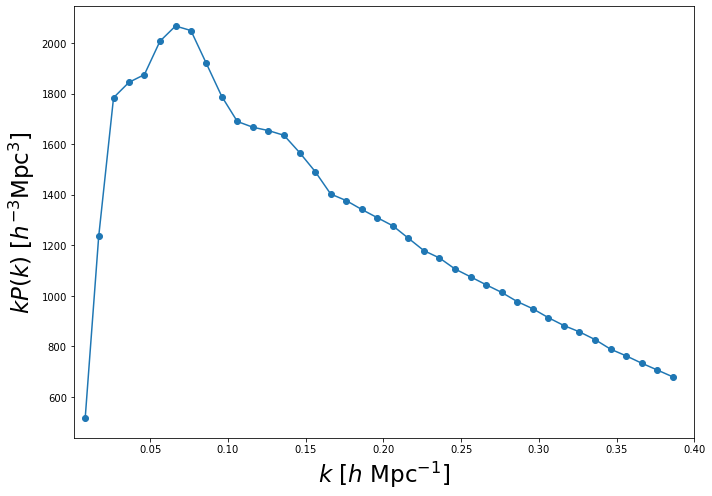

In [48]:
Pk = r.power


plt.figure('FvsC',   figsize=(10, 7))
plt.plot(Pk['k'], Pk['k']*(Pk['power'].real - Pk.attrs['shotnoise']), marker='o')

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", fontsize=23)
plt.ylabel(r"$k P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=23)
plt.xlim(0.001, 0.4)
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
plt.tight_layout()

In [49]:
#Begin loop to get the covariance matrix of the P(k) over 25 seeds
for i in range(25): 
 print (i)   
 # save positions to a plaintext file
 numpy.savetxt('./csv-exampletemp'+str(i)+'.txt', locals()['posnewfid'+str(i)], fmt='%.7e')

 # name each of the 5 input columns
 #names =['x', 'y', 'z', 'w', 'v']
 names =['x', 'y', 'z']

 # read the data
 locals()['f'+str(i)] = CSVCatalog('./csv-exampletemp'+str(i)+'.txt', names)

 # combine x, y, z to Position, and add boxsize
 locals()['f'+str(i)]['Position'] = locals()['f'+str(i)]['x'][:, None] * [1, 0, 0] + locals()['f'+str(i)]['y'][:, None] * [0, 1, 0] + locals()['f'+str(i)]['z'][:, None] * [0, 0, 1]
 locals()['f'+str(i)].attrs['BoxSize'] = 2000.0
 locals()['mesh'+str(i)] = locals()['f'+str(i)].to_mesh(Nmesh=1024, BoxSize=2000.0)   



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [51]:
#Pk calculator looped over
for i in range(25): 
 print (i)   
 locals()['r'+str(i)] = FFTPower(locals()['mesh'+str(i)], mode='1d', dk=0.01, kmin=0.001, kmax=0.4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [52]:

Pk0 = r0.power
#k = Pk0['k']
Pofk0 = Pk0['power'].real - 0*Pk0.attrs['shotnoise']
Pkrealmat = Pofk0

for i in range(1,25):
 locals()['Pk'+str(i)] = locals()['r'+str(i)].power 
 locals()['Pofk'+str(i)] =  locals()['Pk'+str(i)]['power'].real - 0*locals()['Pk'+str(i)].attrs['shotnoise']
 if (i==8):
  continue    
 Pkrealmat = np.vstack((Pkrealmat, locals()['Pofk'+str(i)]))

Pkreal =np.mean(Pkrealmat, axis=0)
pkGRerr=np.std(Pkrealmat, axis=0, ddof=1)
Pkcov =np.cov(Pkrealmat.T)
Pkcorr =np.corrcoef(Pkrealmat.T)

No handles with labels found to put in legend.


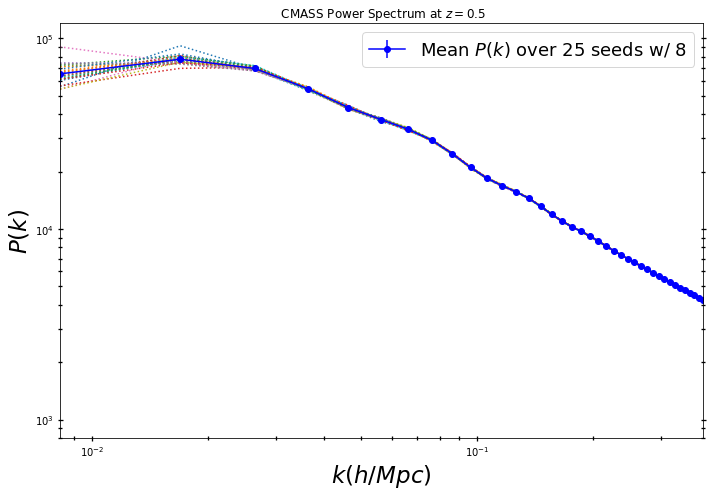

In [53]:
#k       = Pk0fid.k3D
#Pk0     = Pk0fid.Pk[:,0] #monopole

#kRSD       = PkRSD.k3D
#Pk0RSD     = PkRSD.Pk[:,0] #monopole
#Pk2RSD     = PkRSD.Pk[:,1]

k = Pk0['k']

def applyPlotStylePk():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 #plt.grid(True)
 plt.xscale("log")
 plt.yscale("log")
 plt.xlim(k[0], k[k.shape[0]-1])
 plt.ylim(800, 120000)
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 ax.set_xlabel(r"$k (h/Mpc)$", fontsize=23)
 ax.set_ylabel(r"$P(k)$", fontsize=23)
 #plt.ylabel(r"$r (Mpc/h)$",fontsize=18)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})

fig1=plt.figure('Pk', figsize=(10, 7))
ax=fig1.add_subplot(111)
applyPlotStylePk()
ax.set_title(r' CMASS Power Spectrum at $z=0.5$')
#ax.errorbar(k, Pk0, color='b', marker = 'o', markersize='4', label='Real space')
for i in range(25):
 if (i==8):
   continue 
 ax.errorbar(k, locals()['Pofk'+str(i)], linestyle=':')
ax.errorbar(k, Pkreal, yerr=pkGRerr, color='b', marker = 'o', label=r'Mean $P(k)$ over 25 seeds w/ 8')
#ax.errorbar(kRSD, Pk0RSD, color='r', marker = '^', markersize='4', linestyle='-.', label='Redshift space')

#ax.errorbar(k, Pk0fid_8 , label='phase no 8')
#ax.errorbar(kRSD, -Pk2RSD, color='g', marker = '^', markersize='4', linestyle='-.')#, label='Redshift space')
plt.legend(loc="best", frameon=True, numpoints=1, prop={'size':18})
plt.tight_layout()
#plt.savefig('./Pk_phases.png')

In [158]:
k.shape

(39,)

No handles with labels found to put in legend.
/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


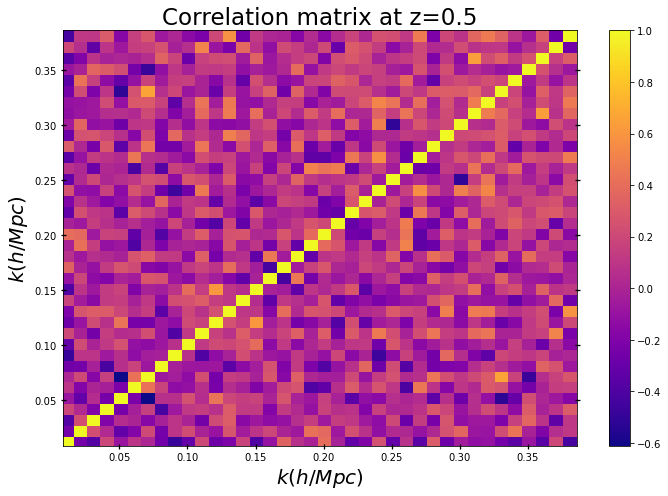

In [54]:
ii = np.where(k<0.5)
kvec = k[ii]
def applyPlotStyle14():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 #plt.xlim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.ylim(kvec[0], kvec[kvec.shape[0]-1])
 plt.xlim(kvec[0], kvec[kvec.shape[0]-1])
 plt.ylim(kvec[0], kvec[kvec.shape[0]-1])   
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 plt.xlabel(r"$k (h/Mpc)$",fontsize=20)
 plt.ylabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$r (Mpc/h)$",fontsize=18)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})

fig11=plt.figure('test', figsize=(10, 7) )
ax=fig11.add_subplot(111)
applyPlotStyle14()
ax.set_title('Correlation matrix at z=0.5', fontsize=23)
pltcov=ax.pcolormesh(k,k,Pkcorr, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corrPMGmat_43, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corr_mat2, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,cov_mat2, cmap='plasma')
fig11.colorbar(pltcov, ax=ax)
plt.tight_layout()
plt.show()

In [182]:
kvec

array([0.00826747, 0.01695011, 0.02649775, 0.03640012, 0.04632181,
       0.05633   , 0.06633919, 0.07623257, 0.08615758, 0.09613032,
       0.10609094, 0.11612513, 0.12612519, 0.13610985, 0.14613478,
       0.15612913, 0.16611377, 0.17609586, 0.18606993, 0.19605737,
       0.20607059, 0.21606808, 0.22606125, 0.23605203, 0.24604513,
       0.25606933, 0.26606373, 0.27604148, 0.28604225, 0.29605343,
       0.30604427, 0.31603873, 0.32604301, 0.33605147, 0.3460501 ,
       0.35603445, 0.36602483, 0.37603161, 0.38604871, 0.3960489 ,
       0.40604992, 0.4160503 , 0.42604741, 0.43604395, 0.44602769,
       0.45602075, 0.46603062, 0.47603571, 0.48604407])

In [35]:
np.amin(posnewfid24)

NameError: name 'posnewfid24' is not defined

In [260]:
Omegavec = np.array([(0.1200+0.02237+0.00064420)/0.6736/0.6736,(0.1200+0.02282+0.00064420)/0.6777/0.6777,(0.1200+0.02193+0.00064420)/0.6696/0.6696,(0.02237+0.1240+0.00064420)/0.6597/0.6597,(0.02237+0.1161+0.00064420)/0.6877/0.6877,(0.1200+0.02237+0.00064420)/0.6736/0.6736,(0.1200+0.02237+0.00064420)/0.6736/0.6736,(0.1200+0.02237+0.00064420)/0.6736/0.6736,(0.1200+0.02237+0.00064420)/0.6736/0.6736])

In [261]:
#Define functions to get Hubble factor for a given cosmology and z
#adot
def adot(a, Om0):
 return np.sqrt(Om0/a+(1-Om0)*a*a)  
def H(a, Om0):
 return adot(a, Om0)/a
#Omega matter for BOSS
h = 0.6736
Om = (0.1200 + 0.02237)/h/h
#print (Om, h)
zref = 0.50
aref = 1.0/(1.0+zref)
#print (zref,aref)
Hubblefac = H(aref, Om)
#print (aref*Hubblefac)

In [262]:
#Now same for RSD
for i in range(25):
 locals()['posRSDfid'+str(i)] = locals()['posfid'+str(i)][:,0:3]+1000 
 locals()['posRSDfid'+str(i)][:,2] += locals()['posfid'+str(i)][:,5]/100./(aref*H(aref,Omegavec[0]))  
 for j in range(locals()['posRSDfid'+str(i)][:,2].shape[0]):
  if (locals()['posRSDfid'+str(i)][j,2]>2000.0):
   locals()['posRSDfid'+str(i)][j,2] -= 2000.0
  if (locals()['posRSDfid'+str(i)][j,2]<0.0):
   locals()['posRSDfid'+str(i)][j,2] += 2000.0 
    

KeyError: 'posfid0'

In [263]:
#for i in cosmoid[1:]:
#    print (i)

In [111]:
BoxSize = 2000.0
jj=0
for i in cosmoid[1:]:
  locals()['posRSD'+str(i)] = locals()['pos'+str(i)][:,0:3]+1000 
  locals()['posRSD'+str(i)][:,2] += locals()['pos'+str(i)][:,5]/100./(aref*H(aref,Omegavec[jj]))  
  for j in range(locals()['posRSD'+str(i)][:,2].shape[0]):
   if (locals()['posRSD'+str(i)][j,2]>BoxSize):
     locals()['posRSD'+str(i)][j,2] -= BoxSize
   if (locals()['posRSD'+str(i)][j,2]<0.0):
     locals()['posRSD'+str(i)][j,2] += BoxSize   
  jj += 1

In [62]:
#Begin loop to get the covariance matrix of the P(k) over 25 seeds
for i in range(25): 
 print (i)   
 # save positions to a plaintext file
 numpy.savetxt('./csv-exampletempRSD'+str(i)+'.txt', locals()['posRSDfid'+str(i)], fmt='%.7e')

 # name each of the 5 input columns
 #names =['x', 'y', 'z', 'w', 'v']
 namesRSD =['x', 'y', 'z']

 # read the data
 locals()['fRSD'+str(i)] = CSVCatalog('./csv-exampletempRSD'+str(i)+'.txt', namesRSD)

 # combine x, y, z to Position, and add boxsize
 locals()['fRSD'+str(i)]['Position'] = locals()['fRSD'+str(i)]['x'][:, None] * [1, 0, 0] + locals()['fRSD'+str(i)]['y'][:, None] * [0, 1, 0] + locals()['fRSD'+str(i)]['z'][:, None] * [0, 0, 1]
 locals()['fRSD'+str(i)].attrs['BoxSize'] = 2000.0
 locals()['meshRSD'+str(i)] = locals()['fRSD'+str(i)].to_mesh(Nmesh=1024, BoxSize=2000.0)   



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [106]:
#cosmoid

In [63]:
# compute the 2D power AND ell=0,2,4 multipoles
#Pk calculator looped over
for i in range(25): 
 print (i)   
 locals()['rRSD'+str(i)] = FFTPower(locals()['meshRSD'+str(i)], mode='2d', dk=0.01, kmin=0.001, kmax=0.4, Nmu=5, los=[0,0,1], poles=[0,2,4])
#r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1], poles=[0,2,4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [112]:
#Begin loop to get the covariance matrix of the P(k) over 25 seeds
for i in cosmoid[1:]: 
 print (i)   
 # save positions to a plaintext file
 numpy.savetxt('./csv-exampletempRSDder'+str(i)+'.txt', locals()['posRSD'+str(i)], fmt='%.7e')

 # name each of the 5 input columns
 #names =['x', 'y', 'z', 'w', 'v']
 namesRSDder =['x', 'y', 'z']

 # read the data
 locals()['fRSDder'+str(i)] = CSVCatalog('./csv-exampletempRSDder'+str(i)+'.txt', namesRSDder)

 # combine x, y, z to Position, and add boxsize
 locals()['fRSDder'+str(i)]['Position'] = locals()['fRSDder'+str(i)]['x'][:, None] * [1, 0, 0] + locals()['fRSDder'+str(i)]['y'][:, None] * [0, 1, 0] + locals()['fRSDder'+str(i)]['z'][:, None] * [0, 0, 1]
 locals()['fRSDder'+str(i)].attrs['BoxSize'] = 2000.0
 locals()['meshRSDder'+str(i)] = locals()['fRSDder'+str(i)].to_mesh(Nmesh=1024, BoxSize=2000.0)   



100
101
102
103
104
105
112
113


In [113]:
# compute the 2D power AND ell=0,2,4 multipoles
#Pk calculator looped over
for i in cosmoid[1:]:
 print (i)   
 locals()['rRSDder'+str(i)] = FFTPower(locals()['meshRSDder'+str(i)], mode='2d', dk=0.01, kmin=0.001, kmax=0.4, Nmu=5, los=[0,0,1], poles=[0,2,4])
#r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1], poles=[0,2,4])

100
101
102
103
104
105
112
113


In [148]:
testdens = meshRSDder100.paint(mode='real')

In [157]:
print (testdens.value)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [119]:
for i in cosmoid[1:]:
 locals()['polesder'+str(i)] = locals()['rRSDder'+str(i)].poles  
 kk = locals()['polesder'+str(i)]['k']
 locals()['Pkl0der_'+str(i)] = locals()['polesder'+str(i)]['power_0'] - locals()['polesder'+str(i)].attrs['shotnoise']   

In [264]:
#Array containing derivative steps around the 4 cosmological parameters
fidsteps = np.array([0.02282-0.02193,0.1240-0.1161,0.9749-0.9549,0.824120-0.792107])

In [265]:
nfish = 4

In [266]:
irange = np.where(k<0.2)
print (kk[irange].shape)

(132,)


In [267]:
Pkl0der_101

NameError: name 'Pkl0der_101' is not defined

In [268]:
for i in range(nfish):
 #print (cosmoid[2*i+1]) 
 #print (locals()['Pk0_'+str(cosmoid[2*i+1])])
 if (i==0): 
  Pdertot = (locals()['Pkl0der_'+str(cosmoid[2*i+1])][irange]-locals()['Pkl0der_'+str(cosmoid[2*i+2])][irange])/fidsteps[i]
 else:
  derint =  (locals()['Pkl0der_'+str(cosmoid[2*i+1])][irange]-locals()['Pkl0der_'+str(cosmoid[2*i+2])][irange])/fidsteps[i]    
  Pdertot = np.vstack((Pdertot,derint))      
 

Pdertot = Pdertot.T

NameError: name 'cosmoid' is not defined

In [129]:
FPk = np.zeros([nfish,nfish])
#Invert Pk0 covariance matrix to use
cov_mat = Pkl0cov[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1] #s12fidcov
#cov_mat *= ((25-15-2)/(25-1))
#cov_mat = np.diag(Pkcov[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])*np.identity(len(k[irange]))
invcov = np.linalg.inv(cov_mat)*((25-20-2)/(25-1))
#Now create and populate Fisher matrix
for ii in range(nfish):
 for jj in range(nfish):
  FPk[ii,jj] = np.dot(Pdertot[irange,ii].flatten(),np.dot(invcov,Pdertot[irange,jj].flatten()))

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [130]:
np.sqrt(np.diag(np.linalg.inv(FPk)))

array([0.00075375, 0.00137393, 0.01559642, 0.00572203])

In [64]:
poles0 = rRSD0.poles
kp =    poles0['k']
Pkl0_0 = poles0['power_0'] - poles0.attrs['shotnoise']
Pkl2_0 = poles0['power_2']
Pkl4_0 = poles0['power_4']

Pkl0mat = Pkl0_0
Pkl2mat = Pkl2_0
Pkl4mat = Pkl4_0

for i in range(1,25):
 locals()['poles'+str(i)] = locals()['rRSD'+str(i)].poles  
 locals()['Pkl0_'+str(i)] = locals()['poles'+str(i)]['power_0'] - locals()['poles'+str(i)].attrs['shotnoise']
 locals()['Pkl2_'+str(i)] = locals()['poles'+str(i)]['power_2']
 locals()['Pkl4_'+str(i)] = locals()['poles'+str(i)]['power_4']    
 if (i==8):
  continue    
 Pkl0mat = np.vstack((Pkl0mat, locals()['Pkl0_'+str(i)]))
 Pkl2mat = np.vstack((Pkl2mat, locals()['Pkl2_'+str(i)]))
 Pkl4mat = np.vstack((Pkl4mat, locals()['Pkl4_'+str(i)]))

Pkl0avg =np.mean(Pkl0mat, axis=0)
Pkl0err=np.std(Pkl0mat, axis=0, ddof=1)
Pkl2avg =np.mean(Pkl2mat, axis=0)
Pkl2err=np.std(Pkl2mat, axis=0, ddof=1)
Pkl4avg =np.mean(Pkl4mat, axis=0)
Pkl4err=np.std(Pkl4mat, axis=0, ddof=1)
#Pkcov =np.cov(Pkrealmat.T)
#Pkcorr =np.corrcoef(Pkrealmat.T)

In [65]:
Pkl0cov = np.cov(Pkl0mat.T)
Pkl0corr = np.corrcoef(Pkl0mat.T)

(0.005, 0.4)

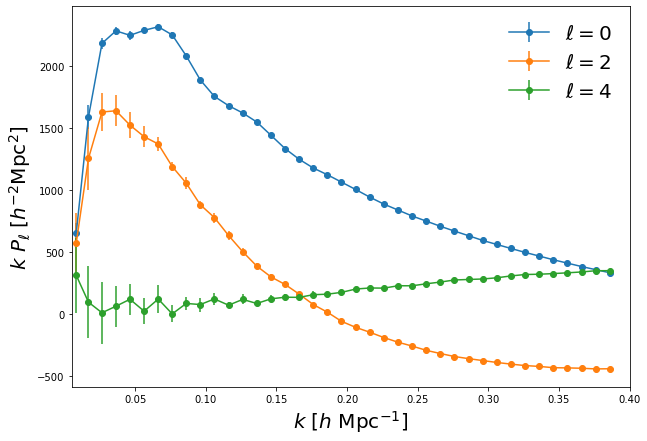

In [68]:
plt.figure('Ls', figsize=(10, 7) )
for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    
    plt.errorbar(poles0['k'], poles0['k'] * locals()['Pkl'+str(ell)+'avg'], yerr=poles0['k'] * locals()['Pkl'+str(ell)+'err'], label=label, marker='o')

# format the axes
plt.legend(loc=0)

plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=20)
plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]",fontsize=20)
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':20})
plt.xlim(0.005, 0.4)

In [72]:
poles0['k'].shape

(39,)

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


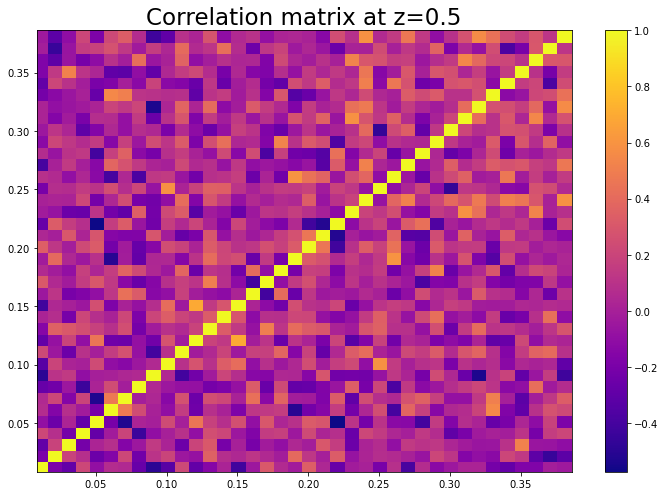

In [69]:
ii = np.where(k<0.5)
kvec = k[ii]
def applyPlotStyle14():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 #plt.xlim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.ylim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.xlim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.ylim(kvec[0], kvec[kvec.shape[0]-1])   
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 plt.xlabel(r"$k (h/Mpc)$",fontsize=20)
 plt.ylabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$r (Mpc/h)$",fontsize=18)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})

fig11=plt.figure('testcov00', figsize=(10, 7) )
ax=fig11.add_subplot(111)
#applyPlotStyle14()
ax.set_title('Correlation matrix at z=0.5', fontsize=23)
pltcov=ax.pcolormesh(kp,kp,np.real(Pkl0corr), cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corrPMGmat_43, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corr_mat2, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,cov_mat2, cmap='plasma')
fig11.colorbar(pltcov, ax=ax)
plt.tight_layout()
plt.show()

In [261]:
xi = cosmology.correlation.pk_to_xi(kp, Pkl0avg, ell=0,
                            )

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/mcfit/mcfit.py:157: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


In [36]:
redg = np.linspace(30,120,40)

In [37]:
#names =['x', 'y', 'z', 'w', 'v']
namesRSDtest =['x', 'y', 'z']

# read the data
fRSDtest = CSVCatalog('./csv-exampletempRSD1.txt', namesRSDtest)

# combine x, y, z to Position, and add boxsize
fRSDtest['Position'] = fRSDtest['x'][:, None] * [1, 0, 0] + fRSDtest['y'][:, None] * [0, 1, 0] + fRSDtest['z'][:, None] * [0, 0, 1]
#locals()['fRSD'+str(i)].attrs['BoxSize'] = 2000.0
#locals()['meshRSD'+str(i)] = locals()['fRSD'+str(i)].to_mesh(Nmesh=1024, BoxSize=2000.0)   


In [39]:
from nbodykit import algorithms
#algorithms.paircount_tpcf.tpcf.SimulationBox2PCF(mode='1d', data1=fRSDtest, edges=redg, BoxSize='2000.0')

In [40]:
#r= np.linspace(10,100,50)
#plt.figure('corrtest', figsize=(10, 7) )
#plt.plot(r, r*xi(r), marker='o')

In [41]:
(4**3-1)/(7**3-1)

0.18421052631578946

In [42]:
FisherdatPkjackalt/FisherdatPkjack64


NameError: name 'FisherdatPkjackalt' is not defined

In [44]:
paramsAbac

NameError: name 'paramsAbac' is not defined

In [42]:
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST.txt')#
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J8L4.txt')
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L7.txt')
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L7343.txt')
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8125.txt')
FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729_1.txt')
FisherdatWSTcomb = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729comb.txt')
FisherdatWST256 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J5L2729x1.txt')
FisherdatWST128 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J5L2128.txt')
FisherdatWSTdec = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729x1dec.txt')
FisherdatWSTdeclog = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729x1declog.txt')
FisherdatWSTq2 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729x1q2.txt')
FisherdatWSTq05 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8729x1q05.txt')
FisherdatWST256q05 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J5L2729x1256q05.txt')
FisherdatWST256q01 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J5L2729x1256q01.txt')
FisherdatWST6424 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L86424.txt')
FisherdatWST64240 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L864240.txt')
FisherdatWST1000 = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L81000comb.txt')
#FisherdatWST = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J7L8125nob.txt')
#FisherdatPk = np.loadtxt('/Users/gev866/Downloads/FisherPk.txt')
FisherdatPk = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035.txt')
#FisherdatPkjack = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jack.txt')
FisherdatPkjack = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jack729.txt')
#FisherdatPkjack = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035high.txt')
FisherdatPkk15high = np.loadtxt('/Users/gev866/Downloads/FisherPk_k015high17.txt')
FisherdatPkk35high = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035high17.txt')
FisherdatPkjackk015 = np.loadtxt('/Users/gev866/Downloads/FisherPk_k015jack729.txt')
#FisherdatPkjackalt = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jackalt.txt')
#FisherdatPkjackalt = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jack343.txt')
FisherdatPkjackalt = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jack729x24.txt')

FisherdatWST64real = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J5L264x1256q1real.txt')

FisherdatPkshot = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035729shot.txt')
FisherdatPknoshot = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035729noshot.txt')
#FisherdatPk = np.loadtxt('/Users/gev866/Downloads/FisherPk_k035jackalt.txt')
#FisherdatPk = np.loadtxt('/Users/gev866/Downloads/FisherWST3d_J8L4.txt')
paramsAbac = [r'\Omega_b h^2', r'\Omega_c h^2', r'n_s', r'\sigma_8']
FisherWST = FisherMatrix(FisherdatWST,paramsAbac)
FisherWSTcomb = FisherMatrix(FisherdatWSTcomb,paramsAbac)
FisherWST256 = FisherMatrix(FisherdatWST256,paramsAbac)
FisherWST128 = FisherMatrix(FisherdatWST128,paramsAbac)
FisherWSTdec = FisherMatrix(FisherdatWSTdec,paramsAbac)
FisherWSTdeclog = FisherMatrix(FisherdatWSTdeclog,paramsAbac)
FisherWSTq2 = FisherMatrix(FisherdatWSTq2,paramsAbac)
FisherWSTq05 = FisherMatrix(FisherdatWSTq05,paramsAbac)
FisherWST256q05 = FisherMatrix(FisherdatWST256q05,paramsAbac)
FisherWST256q01 = FisherMatrix(FisherdatWST256q01,paramsAbac)
FisherWST6424 = FisherMatrix(FisherdatWST6424,paramsAbac)
FisherWST64240 = FisherMatrix(FisherdatWST64240,paramsAbac)
FisherWST1000 = FisherMatrix(FisherdatWST1000,paramsAbac)
FisherPk = FisherMatrix(FisherdatPk,paramsAbac)
FisherPkshot = FisherMatrix(FisherdatPkshot,paramsAbac)
FisherPknoshot = FisherMatrix(FisherdatPknoshot,paramsAbac)
FisherPkjack = FisherMatrix(FisherdatPkjack,paramsAbac)
FisherPkjack015 = FisherMatrix(FisherdatPkjackk015,paramsAbac)
FisherPkjackalt = FisherMatrix(FisherdatPkjackalt,paramsAbac)
FisherPkk35high = FisherMatrix(FisherdatPkk35high,paramsAbac)
FisherPkk15high = FisherMatrix(FisherdatPkk15high,paramsAbac)
                              
FisherWST64real = FisherMatrix(FisherdatWST64real,paramsAbac)                              
                              
#fishertryY10 = [Fishertot,Fishertotk03]

In [43]:
#Array containing fiducial values for the 4 cosmological parameters
fidparams = np.array([0.02237,0.1200,0.9649,0.807952])

In [44]:
fidparams[3]

0.807952

In [45]:
wdict = {r'\Omega_b h^2' : fidparams[0], r'\Omega_c h^2' : fidparams[1], r'n_s' : fidparams[2], r'\sigma_8': fidparams[3]}

In [46]:
#Fishplot = [FisherWST, FisherPk]
Fishshot = [FisherPkshot, FisherPknoshot]
FishrealvsRSD = [FisherWST64240,FisherWST64real]
#Fishdec = [FisherWSTcomb,FisherWSTdec]
Fishdec = [FisherWSTcomb,FisherWSTdec,FisherWSTdeclog]
Fishplot = [FisherWST6424, FisherWST1000,FisherWST, FisherWSTcomb]
#Fishq = [FisherWST,FisherWSTq2]
#Fishq = [FisherWST,FisherWSTq2,FisherWSTq05]
Fishq = [FisherWST,FisherWSTq2,FisherWSTq05]
Fishq256 = [FisherWST256,FisherWST256q05,FisherWST256q01]
#Fishres = [FisherWST, FisherWST256]
Fishres = [FisherWST, FisherWST128, FisherWST256,FisherWST256q05]
#Fishplot = [FisherWST6424, FisherWST64240, FisherWST1000,FisherWST, FisherWSTcomb]
#Fishjackcomp = [FisherPk, FisherPkjack, FisherPkjackalt]
Fishjackcomp = [FisherPkjack015, FisherPkjack, FisherPkjackalt]
#Fishfin = [FisherPkjack015, FisherPkjack, FisherWST256q05]
#Fishfin = [FisherPkjack015, FisherPkk15high, FisherPkjack, FisherPkk35high, FisherWST256q05]
Fishfin = [FisherPkjack015, FisherPkjack, FisherPkk35high, FisherWST256q05]
labelWST = ['WST 64 subsamples, 24 mocks', 'WST 1000 subsamples, 1 mock', 'WST 729 subsamples, 1 mock', 'WST 729 subsamples, 24 mocks',]
#labelWST = ['WST 64 subsamples, 24 mocks', 'WST 64 subsamples, 1 mocks','WST 1000 subsamples, 1 mock', 'WST 729 subsamples, 1 mock', 'WST 729 subsamples, 13 mocks',]
#labelWST = ['All 36 WST coeffs', r'P(k), $k_{max}=0.35$ h/Mpc']
#labeljack = ['Normal Covariance', 'Jackknife 1', 'Jackknife 2']
labeljack = [r'Jackknife 729x1, $k_{max}=0.15$ h/Mpc', r'Jackknife 729x1, $k_{max}=0.35$ h/Mpc', r'Jackknife 729x24, $k_{max}=0.35$ h/Mpc']
labelfin = [r'P(k) $k_{max}=0.15$ h/Mpc', r'P(k) $k_{max}=0.35$ h/Mpc', r'P(k) $k_{max}=0.35$ h/Mpc High res',r'WST $256^3$, J=5, L=2, q=0.5']
#labeldec = ['WST 1 mock regular', 'WST 1 mock decorrelated']
#labelres = [r'WST $128^3$, J=7, L=8', r'WST $256^3$, J=5, L=2']
labelres = [r'WST $128^3$, J=7, L=8', r'WST $128^3$, J=5, L=2', r'WST $256^3$, J=5, L=2',r'WST $256^3$, J=5, L=2, q=0.5']
labeldec = ['WST 1 mock regular', 'WST 1 mock decorrelated', 'WST 1 mock log-decorrelated']
#labelq = [r'WST on mock no1 w/ $q=1$',r'WST on mock no1 w/ $q=2$']
#labelq = [r'WST on mock no1 w/ $q=1$',r'WST on mock no1 w/ $q=2$',r'WST on mock no1 w/ $q=0.5$']
labelq = [r'WST on mock no1 w/ $q=1$',r'WST on mock no1 w/ $q=2$',r'WST on mock no1 w/ $q=0.5$']
labelq256 = [r'WST $256^3$ w/ $q=1$',r'WST $256^3$ w/ $q=0.5$',r'WST $256^3$ w/ $q=0.1$']
labelshot = ['P(k) w/ shot noise','P(k) no shot noise']
labelrealvsRSD = ['RSD, 64 Jackknife x 1 mock','Real space, 64 Jackknife x 1 mock']
#Fishplot = [FisherPk]
#labelWST = ['P(k)']

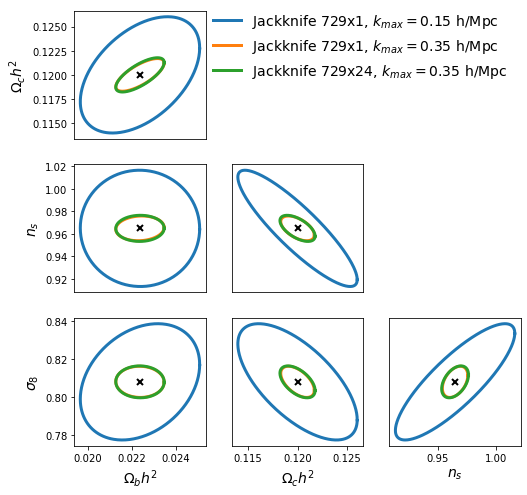

In [47]:
corner_plot(Fishjackcomp, labeljack, wdict, paramsAbac, confidence_level=0.683)

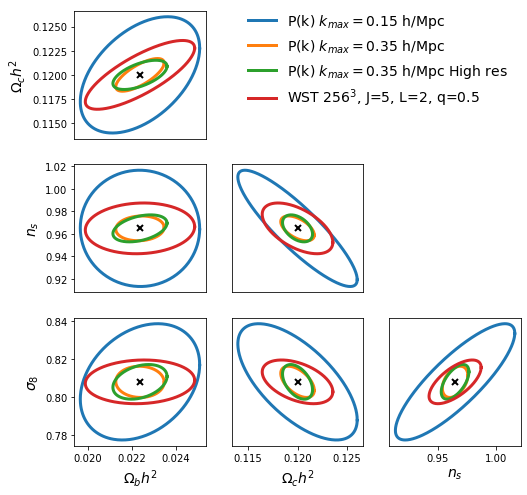

In [48]:
corner_plot(Fishfin, labelfin, wdict, paramsAbac, confidence_level=0.683)

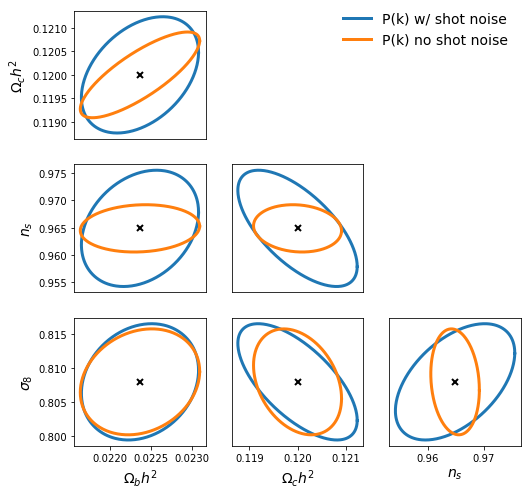

In [49]:
corner_plot(Fishshot, labelshot, wdict, paramsAbac, confidence_level=0.683)

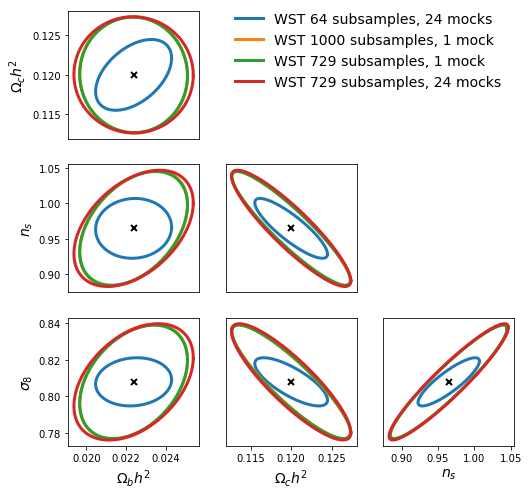

In [50]:
corner_plot(Fishplot, labelWST, wdict, paramsAbac, confidence_level=0.683)
#plt.savefig('./FisherWST.png')
#plt.show()

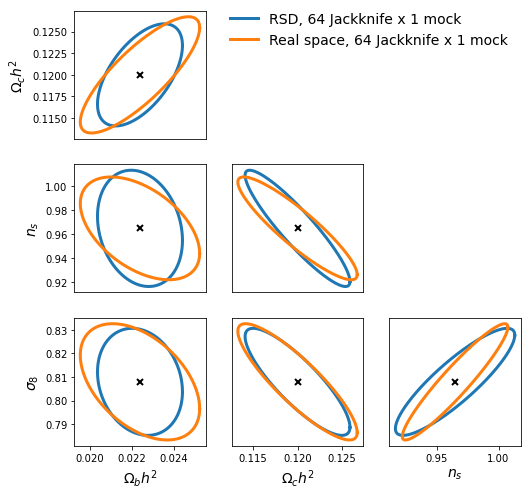

In [51]:
corner_plot(FishrealvsRSD, labelrealvsRSD, wdict, paramsAbac, confidence_level=0.683)

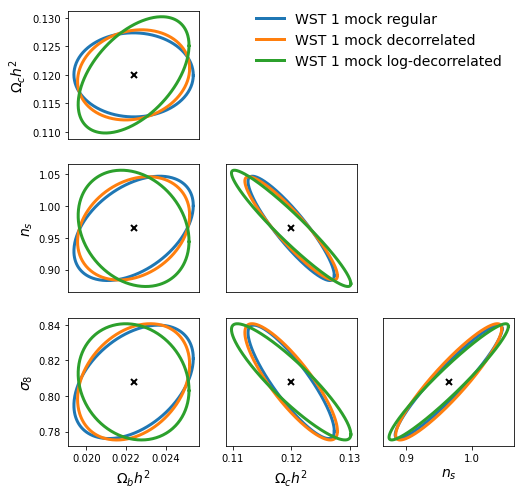

In [52]:
corner_plot(Fishdec, labeldec, wdict, paramsAbac, confidence_level=0.683)

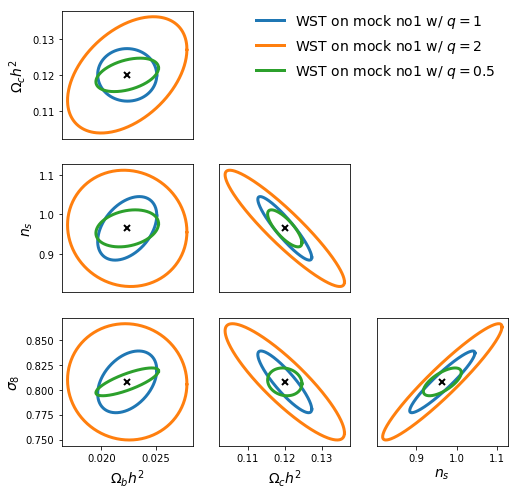

In [53]:
corner_plot(Fishq, labelq, wdict, paramsAbac, confidence_level=0.683)

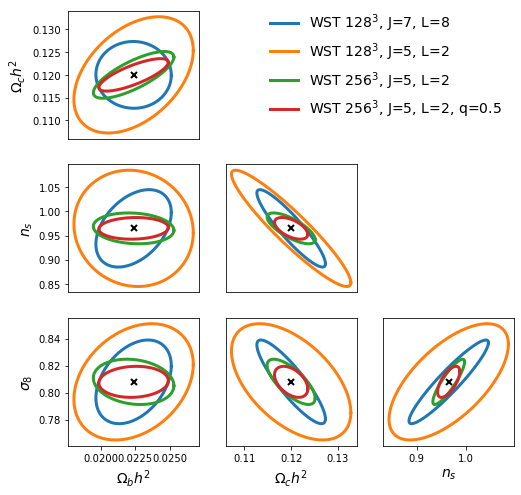

In [54]:
corner_plot(Fishres, labelres, wdict, paramsAbac, confidence_level=0.683)

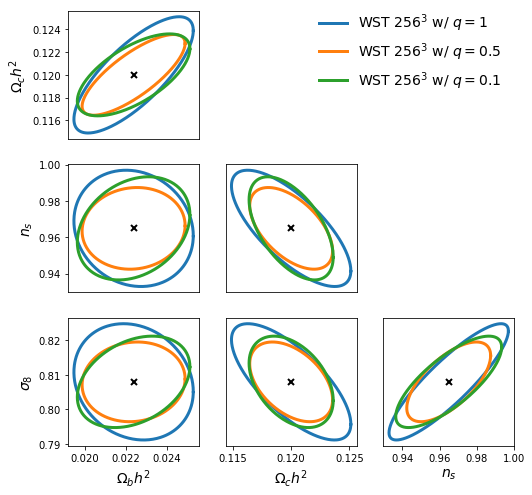

In [55]:
corner_plot(Fishq256, labelq256, wdict, paramsAbac, confidence_level=0.683)

In [56]:
(1-np.sqrt(np.diag(np.linalg.inv(FisherdatWST6424)))/np.sqrt(np.diag(np.linalg.inv(FisherdatPkjackalt))))*100

array([ -72.66856091, -153.61772353, -265.50260636,  -57.00937323])

In [57]:
(np.sqrt(np.diag(np.linalg.inv(FisherWSTcomb)))/np.sqrt(np.diag(np.linalg.inv(FisherWST6424))))

array([1.57046866, 1.64107454, 1.94318801, 2.4126542 ])

In [58]:
(np.sqrt(np.diag(np.linalg.inv(FisherWSTcomb)))/np.sqrt(np.diag(np.linalg.inv(FisherWST6424))))

array([1.57046866, 1.64107454, 1.94318801, 2.4126542 ])

In [59]:
100*np.sqrt(np.diag(np.linalg.inv(FisherdatPkjack)))/np.array([0.02237,0.1200,0.9649,0.807952])

array([3.25793708, 0.92939277, 0.7499686 , 0.67090503])

In [60]:
100*np.sqrt(np.diag(np.linalg.inv(FisherWSTcomb)))/np.array([0.02237,0.1200,0.9649,0.807952])

array([8.8474546 , 4.05192087, 5.61094601, 2.59807615])

In [61]:
np.sqrt(np.diag(np.linalg.inv(FisherWSTcomb)))/np.sqrt(np.diag(np.linalg.inv(FisherWSTdec)))

array([1.06522187, 0.932107  , 1.00953206, 0.97509293])

In [62]:
np.sqrt(np.diag(np.linalg.inv(FisherWSTdeclog)))/np.sqrt(np.diag(np.linalg.inv(FisherWSTdec)))

array([0.98933059, 1.28961914, 1.12529876, 0.99923866])

In [63]:
import math

In [64]:
math.pi*256/2000

0.40212385965949354

In [65]:
Jl=9
testt = np.zeros(Jl)

In [66]:
rbinl  = 2*(3.5*60)*np.power(np.full_like(testt[0:Jl], 2.0),np.arange(Jl))/(512)
rnewl = (rbinl[1:] + rbinl[:-1]) / 2

In [67]:
rbinl

array([  0.8203125,   1.640625 ,   3.28125  ,   6.5625   ,  13.125    ,
        26.25     ,  52.5      , 105.       , 210.       ])

In [68]:
rnewl

array([  1.23046875,   2.4609375 ,   4.921875  ,   9.84375   ,
        19.6875    ,  39.375     ,  78.75      , 157.5       ])

In [69]:

Jl=7
testt = np.zeros(Jl)

In [70]:
rbinlb  = 2*(2000.0)*np.power(np.full_like(testt[0:Jl], 2.0),np.arange(Jl))/(128)
rnewlb = (rbinlb[1:] + rbinlb[:-1]) / 2

In [71]:
rbinlb

array([  31.25,   62.5 ,  125.  ,  250.  ,  500.  , 1000.  , 2000.  ])

In [72]:
rnewlb

array([  46.875,   93.75 ,  187.5  ,  375.   ,  750.   , 1500.   ])

In [73]:
2*math.pi/rnewlb

array([0.13404129, 0.06702064, 0.03351032, 0.01675516, 0.00837758,
       0.00418879])

In [74]:
2*math.pi/(1685.9*0.6898*9.30842e-5)

58.04287247786909

In [75]:
(2*math.pi/(1685.9*0.6898*9.30842e-5))*1685.9*0.6898

67500.01941446117

In [76]:
(2*math.pi/(1685.9*0.6898*0.116355))*1685.9*0.6898

54.00013155583848

In [77]:
thetamin = 0.32*math.pi/180./60.
thetamax = 400.0*math.pi/180./60.

In [78]:
lmax = 2*math.pi/thetamin
print ('lmax =',lmax)
lmin = 2*math.pi/thetamax
print ('lmin =',lmin)

lmax = 67500.0
lmin = 54.0


In [79]:
thetaminalt = 0.8*math.pi/180./60.
thetamaxalt = 160.0*math.pi/180./60.

In [80]:
lmaxalt = 2*math.pi/thetaminalt
print ('lmax =',lmaxalt)
lminalt = 2*math.pi/thetamaxalt
print ('lmin =',lminalt)

lmax = 26999.999999999996
lmin = 135.0


In [81]:
thetaminalt2 = 6.5*math.pi/180./60.
lminalt2 = 2*math.pi/thetaminalt2
print ('lmin =',lminalt2)

lmin = 3323.076923076923


In [82]:
2*math.pi/(math.sqrt(100)*60*math.pi/180./60.)

36.0

In [83]:
(3.5*60)/512

0.41015625

In [84]:
from matplotlib import gridspec
from matplotlib import cm

In [85]:
xiGR = np.loadtxt('/Users/gev866/Downloads/xi0GSM_plinGRDESIELG_z_0.txt')
#xiGR = np.loadtxt('/Users/gev866/Downloads/xi0GSM_plinGRDESIELG_z_0_pure.txt')
xiF6 = np.loadtxt('/Users/gev866/Downloads/xi0GSM_plinMGDESILRGFr6_z_0.txt')
xiF5 = np.loadtxt('/Users/gev866/Downloads/xi0GSM_plinMGDESILRGFr5_z_0.txt')

In [86]:
(xiF5/xiF6)[:,1]

array([ 1.06950625,  1.07915963,  1.08205497,  1.07744139,  1.06980757,
        1.06142189,  1.0548051 ,  1.05110569,  1.05014171,  1.05091154,
        1.05217139,  1.05285798,  1.05231689,  1.05034224,  1.04707868,
        1.04286458,  1.03808827,  1.03309635,  1.0281553 ,  1.02344846,
        1.01908856,  1.01513347,  1.01159962,  1.00847351,  1.00572114,
        1.00329596,  1.00114617,  0.99922048,  0.99747256,  0.99586398,
        0.99436571,  0.99295821,  0.99163045,  0.99037836,  0.98920265,
        0.9881068 ,  0.98709486,  0.98617019,  0.98533434,  0.98458651,
        0.98392361,  0.98334024,  0.98282944,  0.98238339,  0.98199375,
        0.9816522 ,  0.98135117,  0.98108378,  0.98084388,  0.98062626,
        0.98042644,  0.98024038,  0.98006435,  0.97989489,  0.97972834,
        0.9795611 ,  0.97938949,  0.97920936,  0.97901668,  0.97880746,
        0.97857774,  0.97832384,  0.97804244,  0.97773092,  0.97738755,
        0.97701132,  0.97660275,  0.97616385,  0.97569876,  0.97

In [87]:
s = xiGR[:,0]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


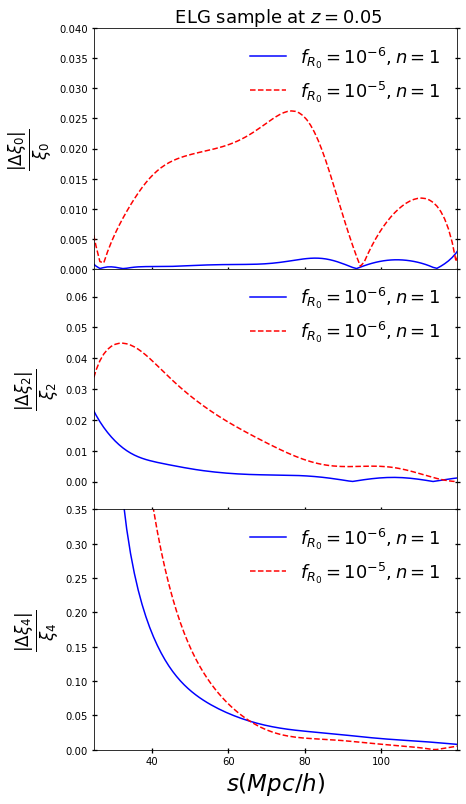

In [88]:

def applyPlotStyles1():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 #plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 plt.xlim(25, 119.7)
 plt.ylim(-0.0, 0.04)
 #plt.ylim(k[0], 0.30)
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 plt.xlabel(r"$s (Mpc/h)$", fontsize=23)
 #plt.ylabel(r"$s^2 \xi_0(s)$", fontsize=23)
 plt.ylabel(r"$\frac{|\Delta \xi_0|}{\xi_0}$", fontsize=24)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})
def applyPlotStyles2():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 #plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 plt.xlim(25, 119.7)
 plt.ylim(-0.009, 0.069)
 #plt.ylim(k[0], 0.30)
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 plt.xlabel(r"$s (Mpc/h)$", fontsize=23)
 #plt.ylabel(r"$-s^2 \xi_2(s)$", fontsize=23)
 plt.ylabel(r"$\frac{|\Delta \xi_2|}{\xi_2}$", fontsize=24)    
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})
def applyPlotStyles3():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 #plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 plt.xlim(25, 119.7)
 plt.ylim(0.0,0.35)
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 plt.xlabel(r"$s (Mpc/h)$", fontsize=23)
 #plt.ylabel(r"$s^2 \xi_4(s)$", fontsize=23)
 plt.ylabel(r"$\frac{|\Delta \xi_4|}{\xi_4}$", fontsize=24)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})
    
gs=gridspec.GridSpec(3,1, wspace=0.0, hspace=0.0, height_ratios=[1,1,1])
#fig10=plt.figure('Pkcomp', figsize=(0.95*9, 0.94*11))
fig1=plt.figure('xiplot', figsize=(0.94*7, 0.94*12))
ax=fig1.add_subplot(gs[0,0])
applyPlotStyles1()
ax2=fig1.add_subplot(gs[1,0])
applyPlotStyles2()
ax3=fig1.add_subplot(gs[2,0])
applyPlotStyles3()
ax.set_title(r' ELG sample at $z=0.05$', fontsize=18)
#ax.errorbar(k, Pk0_000, label='Base Planck', color='b')
#ax.errorbar(s, xiGR[:,1], label='GR', color='k', linestyle='-')
ax.errorbar(s, np.absolute(xiF6[:,1]/xiGR[:,1]-1.0), label=r'$f_{R_0}=10^{-6}, n=1$', color='b', linestyle='-')
ax.errorbar(s, np.absolute(xiF5[:,1]/xiGR[:,1]-1.0), label=r'$f_{R_0}=10^{-5}, n=1$', color='r', linestyle='--')
#ax2.errorbar(s, -xiGR[:,2], label='GR', color='k', linestyle='-')
ax2.errorbar(s, np.absolute((xiF6[:,2]-xiGR[:,2])/xiGR[:,2]), label=r'$f_{R_0}=10^{-6}, n=1$', color='b', linestyle='-')
ax2.errorbar(s, xiF5[:,2]/xiGR[:,2]-1.0, label=r'$f_{R_0}=10^{-6}, n=1$', color='r', linestyle='--')
#ax3.errorbar(s, xiGR[:,3], label='GR', color='k', linestyle='-')
ax3.errorbar(s, np.absolute(xiF6[:,3]/xiGR[:,3]-1.0), label=r'$f_{R_0}=10^{-6}, n=1$', color='b', linestyle='-')
ax3.errorbar(s, np.absolute(xiF5[:,3]/xiGR[:,3]-1.0), label=r'$f_{R_0}=10^{-5}, n=1$', color='r', linestyle='--')
#ax.errorbar(rbinl,np.log(sisotropic_000[0:J3d+1]), label='Base Planck', color='b',marker='o')
#ax.errorbar(rbinl,np.log(sisotropicRSD_000[0:J3d+1]), label='Base Planck', color='m',marker='s')
#for i in cosmoid[3:5]:
# ax.errorbar(rbinl,np.log(locals()['sisotropic_'+str(i)][0:J3d+1]), label=''+str(i)+'',marker='^')
# ax2.errorbar(rbinl, locals()['sisotropic_'+str(i)][0:J3d+1]/sisotropic_000[0:J3d+1]-1.0, label=''+str(i)+'',marker='^')
#ax2.errorbar(rbinl, np.zeros_like(rbinl), color='k') 
#ax2.errorbar(rbinl, sisotropic_100[0:J3d+1]-sisotropic_101[0:J3d+1], label=''+str(i)+'',marker='^')
#ax.errorbar(kRSD, Pk0RSD, color='r', marker = '^', markersize='4', linestyle='-.', label='Redshift space')
ax.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
ax2.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
ax3.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
#ax.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
#ax2.set_xlabel(r"$r (Mpc/h)$", fontsize=23)
#ax.set_ylabel(r"$\ln \left(s_1\right)$", fontsize=23)
plt.tight_layout()
plt.savefig('/Users/gev866/Downloads/xicompresp.pdf')

In [89]:
import math

In [90]:
#from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from scipy.integrate import quad, dblquad
import multiprocessing as mp
from scipy.integrate import odeint

In [91]:
#Define a-dependent functions for growth factor equation 
def Omegatime(a, Om0):
 return Om0/(Om0+(1-Om0)*a*a*a)
#adot
def adot(a, Om0):
 return np.sqrt(Om0/a+(1-Om0)*a*a)  
def H(a, Om0):
 return adot(a, Om0)/a
def adotprime(a, Om0):
 return (-Om0/a/a + 2*(1-Om0)*a)/np.sqrt(Om0/a+(1-Om0)*a*a)/2
#Define additional functions needed for 
def mfr(a, Om0, fr0, nfr): #scalar field mass
 return (1/2997.72)*math.sqrt(1./(nfr+1)/fr0)*math.sqrt(math.pow(Om0+4*(1-Om0),-nfr-1))*math.sqrt(math.pow(Om0/a/a/a+4*(1-Om0),2+nfr))
def geff(a, Om0, fr0, nfr, k): #g_eff
 return k*k/(k*k+a*a*mfr(a, Om0, fr0, nfr)*mfr(a, Om0, fr0, nfr))/3
#Define 1/adot^3 integrand
def invadot3(a, Om0):
 return 1/adot(a, Om0)/adot(a, Om0)/adot(a, Om0)
#Define 1/adot^3 integral
def intToday(Om0, amin):
 return quad(invadot3,0,amin,args=(Om0))[0] 
def Damin(Om0, amin):
 return 2.5*Om0*H(amin, Om0)*intToday(Om0, amin)
def DH1(a, Om0):
 return -3*Om0/(2*a*a*a*math.sqrt((a*a*a+Om0-Om0*a*a*a)/a))
def der0(Om0, amin):
 return 2.5*Om0*(DH1(amin, Om0)*intToday(Om0, amin)+H(amin, Om0)*invadot3(amin, Om0))

#print (der0(Om,0.002))


abserr = 1.0e-13
relerr = 1.0e-13
#Define growth factor differential equation system
def growth(y, a, Om0):
 D, w = y
 dyda = [w, -(adotprime(a, Om0) + 2*H(a, Om0))*w/adot(a, Om0) + 1.5*Omegatime(a, Om0)*H(a, Om0)*H(a, Om0)*D/adot(a, Om0)/adot(a, Om0)]
 return dyda
 
#y0 = [0.0019999999,0.999999999]   
arange = np.logspace(math.log(0.002,10),math.log(1,10),1000)
#setting up boundary conditions 
y0 = [Damin(Om, arange[0]),der0(Om, arange[0])] 
sol = odeint(growth, y0, arange, args=(Om,), atol=abserr, rtol=relerr)
#t_span=[0.002,1]
#sol = solve_ivp(growth, t_span, y0, args=(Om,))
#np.vectorize(odeint(growth, y0, arange, args=(Om,), atol=abserr, rtol=relerr))
#plt.plot(arange, sol[:,0]/sol[sol.shape[0]-1,0], 'b')
#print (sol[999,0])

def growthMG(y, a, Om0, fr0, nfr, k):
 D, w = y
 dyda = [w, -(adotprime(a, Om0) + 2*H(a, Om0))*w/adot(a, Om0) + 1.5*Omegatime(a, Om0)*H(a, Om0)*H(a, Om0)*D*(1+geff(a, Om0, fr0, nfr, k))/adot(a, Om0)/adot(a, Om0)]
 return dyda
#klin, Pklin = np.loadtxt("./plinGRDESIpl_z0.txt", unpack=True)
#kscale=klin
#growthMG=np.vectorize(growthMG)


#DMG = interp2d(arange, kscale, solMG, kind='cubic')
#fgrowthMG = interp2d(arange, kscale, fMG, kind='cubic')

#Defining mygrowth routine to efficiently get D(k,aref) & f(k,aref) for a given time aref
def mygrowthMG(ascale, Om0, fr0, nfr, k):
 arangeint = np.logspace(math.log(0.002,10),math.log(ascale,10),1000)
 soltemp = odeint(growthMG, y0, arangeint, args=(Om,fr0,nfr,k), atol=abserr, rtol=relerr)
 return soltemp[999,0],ascale*soltemp[999,1]/soltemp[999,0]
mygrowthMG = np.vectorize(mygrowthMG)

In [92]:
klin, Pklin = np.loadtxt("/Users/gev866/Downloads/plinGRDESIpl_z0.txt", unpack=True)
#klin = klin[130:930]
#Pklin = Pklin[130:930]
#print (klin)

In [93]:
klin[1230]

21.97

In [94]:
kk = np.logspace(-3,0,100)

In [42]:
Om=0.308509
fr6=math.pow(10.,-6.)
fr5=math.pow(10.,-5.)
nfr=1.
D6 = mygrowthMG(0.87, Om, fr6, nfr, klin)[0]
D5 = mygrowthMG(0.87, Om, fr5, nfr, klin)[0]


In [89]:
frGR=math.pow(10.,-12.)
DGR = mygrowthMG(0.87, Om, frGR, nfr, klin)[0]

In [90]:
fGR = mygrowthMG(0.87, Om, frGR, nfr, klin)[1]

In [91]:
#D5/DGR

In [92]:
Dgr = interp1d(arange, sol[:,0], kind='cubic')
#and also growth rate
fgr = interp1d(arange, arange*sol[:,1]/sol[:,0], kind='cubic')

In [93]:
fGR[0]/fgr(0.87)

0.9918850729744648

In [322]:
fgr(0.87)

NameError: name 'fgr' is not defined

In [323]:
#klin

In [95]:
b1=0.84*Dgr(1)/Dgr(0.87) #Bias for ELGs
#print (arange[i])
print (b1)
#Lagrangian linear bias
b1L=b1-1
#Eulerian 2nd order bias
b2 = 0.412 - 2.143*b1+0.929*b1*b1+0.008*b1*b1*b1
#Lagrangian 2nd order bias
b2L = b2 - (8./21.)*b1+(8./21.)
print (b1L,b2L)

NameError: name 'Dgr' is not defined

In [96]:
#Fiducial MG cosmology
Om=0.308509
fr0=math.pow(10.,-6.)
#fr0=math.pow(10.,-5.)
nfr=1.
#Setup integration to get comoving volume for various z bin
#Comoving distance integrator
def integrand(a, Omm):
 return 1/math.sqrt(a*Omm+a*a*a*a*(1-Omm))
#get comoving volume
def Vcom(z):
 return (4*math.pi*14000)/(3*41252.96)*math.pow(2997.92*quad(integrand, 1./(1+z), 1, args=(Om))[0],3)*math.pow(10,-9)
#print (Vcom(0.2)-Vcom(0.1))
#get comoving differential volume in redshift bin with width +-0.05
def Vbin(z):
 return Vcom(z+0.05)-Vcom(z-0.05)
#print (Vbin(0.15))
zrange = np.linspace(0.15,1.85,18)
Veff=np.vectorize(Vbin)
#print (Veff(zrange))

dNLRG = np.array([50, 125, 222, 332, 448, 563, 675, 471, 91, 11]) #galaxy number densities for DESI LRGs
dNELG = np.array([376, 347, 291, 285, 431, 722, 1112, 1333, 1401, 1469, 1483, 1421, 1120, 775, 460, 179, 49, 0]) #galaxy number densities for DESI ELGs

In [97]:
NLRG=14000*0.1*dNLRG #expected number of objects at z=1, LRGs
VLRG=Veff(zrange[:10])*math.pow(10,9) #expected survey volume in (Mpc/h)^3
ndensLRG=NLRG/VLRG

NELG=14000*0.1*dNELG #expected number of objects at z=1, LRGs
VELG=Veff(zrange[:])*math.pow(10,9) #expected survey volume in (Mpc/h)^3
ndensELG=NELG/VELG



In [98]:
def beta_DGP(a, Om0, n):
 betadenom = 1 + 2*n*H(a, Om0)*(1+DH1(a, Om0)*adot(a, Om0)/(3*H(a, Om0)*H(a, Om0)))
 return betadenom #math.sqrt(1/(6*betadenom))
beta_DGP = np.vectorize(beta_DGP)

In [99]:
beta_DGP(0.8, Om, 1)

array(2.74543311)

In [100]:
np.mean(ndensELG[:17])

0.0004959371256558476

In [101]:
np.mean(ndensLRG)

0.00024822403372211984

In [331]:
Halodat = np.loadtxt("/Users/gev866/Downloads/Rockstar_M200c_GR_B4_B1024_NP1024_S38.dat")

KeyboardInterrupt: 

In [ ]:
np.where(Halodat[:,33]!=-1)[0].shape

In [ ]:
5*4*600*7*Halodat[np.where(Halodat[:,2]>=10**13),2].shape[1]/Halodat.shape[0]/34

In [ ]:
np.where(Halodat[:,2]>=10**13)[0].shape

In [182]:
Mhal = Halodat[np.where(Halodat[:,2]>=10**13),2]

In [183]:
xhal = Halodat[np.where(Halodat[:,2]>=10**13),8]
yhal = Halodat[np.where(Halodat[:,2]>=10**13),9]
zhal = Halodat[np.where(Halodat[:,2]>=10**13),10]
vxhal = Halodat[np.where(Halodat[:,2]>=10**13),11]
vyhal = Halodat[np.where(Halodat[:,2]>=10**13),12]
vzhal = Halodat[np.where(Halodat[:,2]>=10**13),13]

In [193]:
np.savetxt('/Users/gev866/Downloads/Testhal.txt', (np.vstack((xhal,yhal,zhal,vxhal,vyhal,vzhal,Mhal))).T, fmt = '%1.8e')

In [202]:
10*4*3*33

3960

In [102]:
aaold, Eold, a1old, a2old, Bold, Cold = np.loadtxt('/Users/gev866/Downloads/Galdat.txt', unpack=True )
aa, E, a1, a2, B, C = np.loadtxt('/Users/gev866/Downloads/Galnewdat.txt', unpack=True )

In [285]:
kGR, PkGR = np.loadtxt("/Users/gev866/Downloads/PGRnewhighk.txt", unpack=True)
kGRold, PkGRold = np.loadtxt("/Users/gev866/Downloads/PGRnewtest.txt", unpack=True)
kg, PkGalold = np.loadtxt("/Users/gev866/Downloads/PGaltest.txt", unpack=True)
kg, PkGal = np.loadtxt("/Users/gev866/Downloads/PGalhighk.txt", unpack=True)
kg, PkGalnew = np.loadtxt("/Users/gev866/Downloads/PGalnewhighk.txt", unpack=True)
#kg, PkGal2 = np.loadtxt("/Users/gev866/Downloads/PGaltest2.txt", unpack=True)
kg, PkGalx100 = np.loadtxt("/Users/gev866/Downloads/PGalx100.txt", unpack=True)
kg, PkGallin = np.loadtxt("/Users/gev866/Downloads/PGallinhighk.txt", unpack=True)
kN, PkN1 = np.loadtxt("/Users/gev866/Downloads/PN1testhighk.txt", unpack=True)

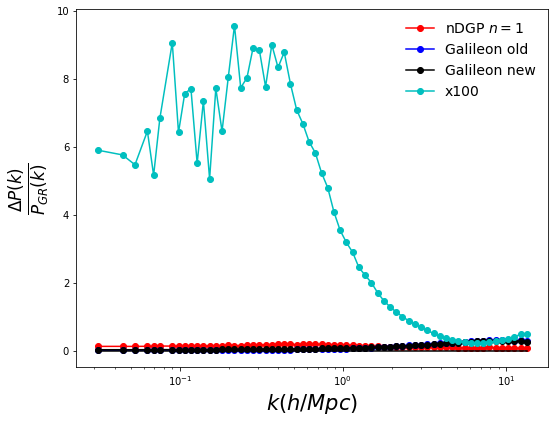

In [297]:
plt.figure('Galileon_test', figsize=(0.94*9, 0.94*7))
#plt.semilogx(kGR, PkGalold/PkGRold-1, color='g', label='Galileon old result', marker='o')
plt.semilogx(kGR, PkN1/PkGR-1, color='r', label=r'nDGP $n=1$', marker='o')
plt.semilogx(kGR, PkGal/PkGR-1, color='b', label='Galileon old', marker='o')
plt.semilogx(kGR, PkGalnew/PkGR-1, color='k', label='Galileon new', marker='o')
#plt.semilogx(kGR, PkGallin/PkGR-1, color='g', label='Linear Galileon', marker='s')
plt.semilogx(kGR, PkGalx100/PkGR-1, color='c', label='x100', marker='o')
#plt.semilogx(kGR, PkGal2/PkGR-1, color='r')
plt.semilogx(kGR, np.zeros_like(kGR), color='k')
#plt.xlim(0.03, 6)
plt.xlabel(r"$k (h/Mpc)$", fontsize=21)
#plt.ylabel(r"$-s^2 \xi_2(s)$", fontsize=23)
plt.ylabel(r"$\frac{\Delta P(k)}{P_{GR}(k)}$", fontsize=24)  
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':14})

In [105]:
Om

0.308509

(0.02, 1)

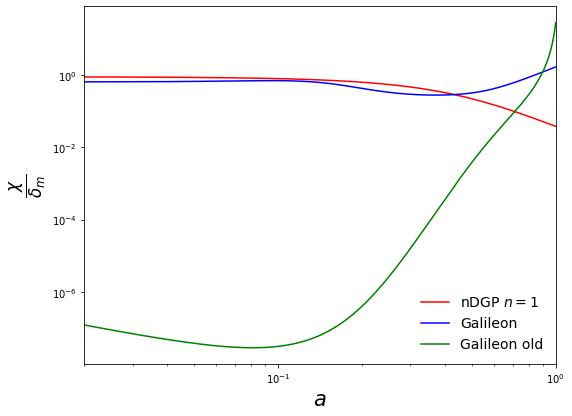

In [106]:
plt.figure('scr_test', figsize=(0.94*9, 0.94*7))
plt.loglog(aa, 8*Om/9/beta_DGP(aa, Om, 1)/beta_DGP(aa, Om, 1)/aa/aa/aa, color='r', label=r'nDGP $n=1$')
plt.loglog(aa, (B*C*Om/aa/aa/aa/E/E), color='b', label='Galileon')
plt.loglog(aaold, (Bold*Cold*Om/aaold/aaold/aaold/Eold/Eold), color='g', label='Galileon old')
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':14})
plt.xlabel(r"$a$", fontsize=21)
plt.ylabel(r"$\frac{\chi}{\delta_{m}}$", fontsize=24) 
plt.xlim(0.02, 1)

(0.02, 1)

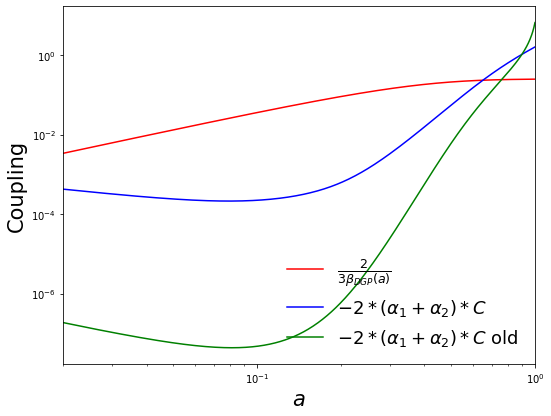

In [107]:
plt.figure('couple_test', figsize=(0.94*9, 0.94*7))
plt.loglog(aa, 2.0/beta_DGP(aa, Om, 1)/3, color='r', label=r'$\frac{2}{3 \beta_{DGP}(a)}$')
plt.loglog(aa, -2*(a1+a2)*C, color='b', label=r'$-2*\left(\alpha_1+\alpha_2\right)*C$')
plt.loglog(aaold, -2*(a1old+a2old)*Cold, color='g', label=r'$-2*\left(\alpha_1+\alpha_2\right)*C$ old')
plt.xlim(0.02, 1)
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
plt.xlabel(r"$a$", fontsize=21)
plt.ylabel("Coupling", fontsize=21) 
plt.xlim(0.02, 1)

(0.02, 1.01)

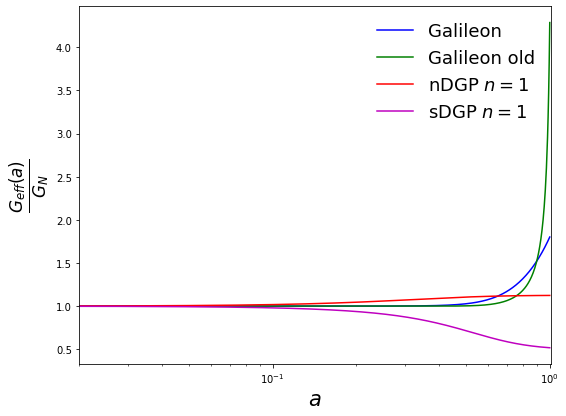

In [108]:
plt.figure('G_test', figsize=(0.94*9, 0.94*7))
plt.semilogx(aa, 1-1*(a1+a2)*C, color='b', label='Galileon')
plt.semilogx(aaold, 1-1*(a1old+a2old)*Cold, color='g', label='Galileon old')
plt.semilogx(aa, 1+1.0/beta_DGP(aa, Om, 1)/3, color='r', label='nDGP $n=1$')
plt.semilogx(aa, 1+1.0/beta_DGP(aa, Om, -1)/3, color='m', label='sDGP $n=1$')
plt.xlabel(r"$a$", fontsize=21)
plt.ylabel(r"$\frac{G_{eff}(a)}{G_N}$", fontsize=24) 
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})
plt.xlim(0.02, 1.01)
#plt.ylim(0.5, 2)

In [109]:
cosmoQi = ['Om_p','Om_m','Ob2_p','Ob2_m','s8_p','s8_m','ns_p','ns_m','h_p','h_m','Mnu_p','Mnu_pp','Mnu_ppp']

In [110]:
for idd in cosmoQi[:2]:
    print (idd)

Om_p
Om_m


In [111]:
for idd in cosmoQi[:10]:
 k, locals()['Pkl0der_'+str(idd)] = np.loadtxt('/Users/gev866/Downloads/Pkmean500'+str(idd)+'Quij256.txt', unpack=True)
 #khigh, locals()['Pkl0derhigh_'+str(idd)] = np.loadtxt('/Users/gev866/Downloads/'+str(idd)+'Quij256.txt', unpack=True)


In [112]:
import gc
#New part to load all Pk-data from full high-res Quijote simulations
Nder = 500 #2000

for idd in cosmoQi[:10]:
#for idd in cosmoQi[:1]:
  print (idd)  
  for s in range(Nder):
    count = 0
    #print (s)

    khigh, Pkl0  = np.loadtxt('/Users/gev866/Downloads/QuijPk/'+str(idd)+'/'+str(s)+'/Pk_m_z=0.txt', unpack=True)

    if (s==0):
        Pkmat = Pkl0

    else:
        Pkmat = np.vstack((Pkmat, Pkl0))
    
    gc.collect()
    count += 1
    del Pkl0

  Pkmean = np.mean(Pkmat, axis=0)
  locals()['Pkl0derhigh_'+str(idd)] = Pkmean
  #np.savetxt('/Users/gev866/Downloads/QuijPk/'+str(idd)+'/Pkmean500_'+str(idd)+'_m_z=0.txt', (np.vstack((khigh,Pkmean))).T, fmt='%.7e')
  del khigh, Pkmat, Pkmean  

Om_p
Om_m
Ob2_p
Ob2_m
s8_p
s8_m
ns_p
ns_m
h_p
h_m


In [113]:
khigh, Pkl0  = np.loadtxt('/Users/gev866/Downloads/QuijPk/Om_p/0/Pk_m_z=0.txt', unpack=True)

In [114]:
import gc
#New part to load all Pk-data from full high-res Quijote simulations, Now for fiducial
Nfid = 15000 #2000


for s in range(100,793):
    #count = 0
    print (s)
    khigh, Pkl0  = np.loadtxt('/Users/gev866/Downloads/QuijPk/fiducial/'+str(s)+'/Pk_m_z=0.txt', unpack=True)

    if (s==100):
        Pkmat = Pkl0

    else:
        Pkmat = np.vstack((Pkmat, Pkl0))
for s in range(1000,7930):
    #count = 0
    print (s)
    khigh, Pkl0  = np.loadtxt('/Users/gev866/Downloads/QuijPk/fiducial/'+str(s)+'/Pk_m_z=0.txt', unpack=True)        
    Pkmat = np.vstack((Pkmat, Pkl0))
for s in range(10000,15000):
    #count = 0
    print (s)
    khigh, Pkl0  = np.loadtxt('/Users/gev866/Downloads/QuijPk/fiducial/'+str(s)+'/Pk_m_z=0.txt', unpack=True)        
    Pkmat = np.vstack((Pkmat, Pkl0))    
    #gc.collect()
    #count += 1
del Pkl0

  

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349


In [115]:
Pkmeanfid = np.mean(Pkmat, axis=0)
    #locals()['Pkl0derhigh_'+str(idd)] = Pkmean
#np.savetxt('/Users/gev866/Downloads/QuijPk/fiducial/Pkmean120000fid_m_z=0.txt', (np.vstack((khigh,Pkmeanfid))).T, fmt='%.7e')
Pkhighcovfid = np.cov(Pkmat.T)
#np.savetxt('/Users/gev866/Downloads/QuijPk/fiducial/Pkcov120000fid_m_z=0.txt', Pkhighcovfid, fmt='%.7e')

In [116]:
Pkhighcovfid.shape

(886, 886)

In [117]:
nQi=5
fidstepsQi = np.array([0.02,0.004,0.03,0.04,0.04])

In [118]:
#Pkfid = np.loadtxt()

In [215]:

irange = np.where(k<=0.5)
irange4 = np.where(k<=0.4)
irange3 = np.where(k<=0.3)
irange2 = np.where(k<=0.2)
irange1 = np.where(k<=0.1)
irange0 = np.where(k<=0.05)
irangehigh = np.where(khigh<=0.5)
irangehigh4 = np.where(khigh<=0.4)
irangehigh3 = np.where(khigh<=0.3)
irangehigh2 = np.where(khigh<=0.2)
irangehigh1 = np.where(khigh<=0.1)
irangehigh0 = np.where(khigh<=0.05)

In [216]:
irangehigh

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),)

In [121]:
khigh

array([0.00889964, 0.01507912, 0.0214479 , 0.02783661, 0.034351  ,
       0.04047887, 0.04676717, 0.05308225, 0.05945362, 0.06576225,
       0.07196633, 0.07827861, 0.08470399, 0.09096855, 0.0972079 ,
       0.1034763 , 0.10975764, 0.11605431, 0.12236697, 0.12868173,
       0.13495008, 0.14119496, 0.14751336, 0.15378651, 0.16006575,
       0.16639912, 0.17271956, 0.17897652, 0.18523537, 0.19148068,
       0.19778899, 0.20409377, 0.21039393, 0.21669097, 0.22297003,
       0.229262  , 0.23551415, 0.24179106, 0.24808565, 0.25434923,
       0.26063343, 0.26692574, 0.27324233, 0.27955297, 0.28583663,
       0.29208763, 0.29834498, 0.30463826, 0.31092791, 0.31721682,
       0.32351876, 0.32981682, 0.33611764, 0.34237004, 0.34864782,
       0.35494116, 0.36119169, 0.36747671, 0.37376478, 0.3800654 ,
       0.38635399, 0.39261402, 0.39892645, 0.40520732, 0.41149165,
       0.41778143, 0.42404006, 0.43034257, 0.43663586, 0.44289962,
       0.44916344, 0.45544141, 0.46176345, 0.46806442, 0.47434

In [122]:
for i in range(nQi):
 if (i==0): 
  Pdertot = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange])/fidstepsQi[i]
 else:
  derint =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange])/fidstepsQi[i]    
  Pdertot = np.vstack((Pdertot,derint))  
  
#derMnu =  (locals()['Pkl0der_'+str(cosmoQi[12])][irange]-12*locals()['Pkl0der_'+str(cosmoQi[11])][irange]+32*locals()['Pkl0der_'+str(cosmoQi[10]-21*Pkfid)][irange])/1.2
#Pdertot = np.vstack((Pdertot,derMnu))

Pdertot = Pdertot.T

In [123]:
for i in range(nQi):
 if (i==0): 
  Pdertot4 = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange4]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange4])/fidstepsQi[i]
 else:
  derint4 =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange4]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange4])/fidstepsQi[i]    
  Pdertot4 = np.vstack((Pdertot4,derint4))  
  

Pdertot4 = Pdertot4.T

In [124]:
for i in range(nQi):
 if (i==0): 
  Pdertot3 = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange3]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange3])/fidstepsQi[i]
 else:
  derint3 =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange3]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange3])/fidstepsQi[i]    
  Pdertot3 = np.vstack((Pdertot3,derint3))  
  

Pdertot3 = Pdertot3.T

In [125]:
for i in range(nQi):
 if (i==0): 
  Pdertot2 = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange2]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange2])/fidstepsQi[i]
 else:
  derint2 =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange2]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange2])/fidstepsQi[i]    
  Pdertot2 = np.vstack((Pdertot2,derint2))  
  

Pdertot2 = Pdertot2.T

In [126]:
for i in range(nQi):
 if (i==0): 
  Pdertot1 = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange1]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange1])/fidstepsQi[i]
 else:
  derint1 =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange1]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange1])/fidstepsQi[i]    
  Pdertot1 = np.vstack((Pdertot1,derint1))  
  

Pdertot1 = Pdertot1.T

In [127]:
for i in range(nQi):
 if (i==0): 
  Pdertot0 = (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange0]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange0])/fidstepsQi[i]
 else:
  derint0 =  (locals()['Pkl0der_'+str(cosmoQi[2*i])][irange0]-locals()['Pkl0der_'+str(cosmoQi[2*i+1])][irange0])/fidstepsQi[i]    
  Pdertot0 = np.vstack((Pdertot0,derint0))  
  

Pdertot0 = Pdertot0.T

In [128]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh])/fidstepsQi[i]
 else:
  derinthigh =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh])/fidstepsQi[i]    
  Pdertothigh = np.vstack((Pdertothigh,derinthigh))  
  
#derMnu =  (locals()['Pkl0der_'+str(cosmoQi[12])][irange]-12*locals()['Pkl0der_'+str(cosmoQi[11])][irange]+32*locals()['Pkl0der_'+str(cosmoQi[10]-21*Pkfid)][irange])/1.2
#Pdertot = np.vstack((Pdertot,derMnu))

Pdertothigh = Pdertothigh.T

In [219]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh0 = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh0]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh0])/fidstepsQi[i]
 else:
  derinthigh0 =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh0]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh0])/fidstepsQi[i]    
  Pdertothigh0 = np.vstack((Pdertothigh0,derinthigh0))  
  

Pdertothigh0 = Pdertothigh0.T

In [221]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh2 = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh2]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh2])/fidstepsQi[i]
 else:
  derinthigh2 =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh2]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh2])/fidstepsQi[i]    
  Pdertothigh2 = np.vstack((Pdertothigh2,derinthigh2))  
  

Pdertothigh2 = Pdertothigh2.T

In [222]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh3 = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh3]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh3])/fidstepsQi[i]
 else:
  derinthigh3 =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh3]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh3])/fidstepsQi[i]    
  Pdertothigh3 = np.vstack((Pdertothigh3,derinthigh3))  
  

Pdertothigh3 = Pdertothigh3.T

In [223]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh4 = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh4]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh4])/fidstepsQi[i]
 else:
  derinthigh4 =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh4]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh4])/fidstepsQi[i]    
  Pdertothigh4 = np.vstack((Pdertothigh4,derinthigh4))  
  

Pdertothigh4 = Pdertothigh4.T

In [ ]:
for i in range(nQi):
 if (i==0): 
  Pdertothigh1 = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh1]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh1])/fidstepsQi[i]
 else:
  derinthigh1 =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])][irangehigh1]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])][irangehigh1])/fidstepsQi[i]    
  Pdertothigh1 = np.vstack((Pdertothigh1,derinthigh1))  
  

Pdertothigh1 = Pdertothigh1.T

In [129]:
for i in range(nQi):
 if (i==0): 
  Pdertothighfull = (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])])/fidstepsQi[i]
 else:
  derinthighfull =  (locals()['Pkl0derhigh_'+str(cosmoQi[2*i])]-locals()['Pkl0derhigh_'+str(cosmoQi[2*i+1])])/fidstepsQi[i]    
  Pdertothighfull = np.vstack((Pdertothighfull,derinthighfull))  
  
#derMnu =  (locals()['Pkl0der_'+str(cosmoQi[12])][irange]-12*locals()['Pkl0der_'+str(cosmoQi[11])][irange]+32*locals()['Pkl0der_'+str(cosmoQi[10]-21*Pkfid)][irange])/1.2
#Pdertot = np.vstack((Pdertot,derMnu))

Pdertothighfull = Pdertothighfull.T

In [130]:
for i in range(5):
    print (cosmoQi[2*i],cosmoQi[2*i+1])

Om_p Om_m
Ob2_p Ob2_m
s8_p s8_m
ns_p ns_m
h_p h_m


In [131]:
covPkfid1000 = np.loadtxt('/Users/gev866/Downloads/CovPkfidQuij1000256.txt')
covPkfid2000 = np.loadtxt('/Users/gev866/Downloads/CovPkfidQuij2000256.txt')
covPkfid10000 = np.loadtxt('/Users/gev866/Downloads/CovPkfidQuij10000256.txt')

In [217]:
#(covPkfid10000/covPkfid2000)

In [133]:
Pdertot.shape

(99, 5)

In [134]:
FPk = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat = (covPkfid10000[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack0[3:, 3:])
#cov_mat *= ((25-15-2)/(25-1))
#cov_mat = np.diag(Pkcov[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])*np.identity(len(k[irange]))
#invcov = np.linalg.inv(cov_mat)*((24-kp[irange].shape[0]-2)/(24-1))
#invcov = np.linalg.inv(cov_mat)*((4**3-kp[irange].shape[0]-2)/(4**3-1))
invcov = np.linalg.inv(cov_mat)*((10**4-k[irange].shape[0]-2)/(10**4-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPk[ii,jj] = np.dot((Pdertot[0:,ii]),np.dot(invcov,(Pdertot[0:,jj].T)))

In [135]:
FPk0 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat0 = (covPkfid10000[0: np.array(irange0)[0][-1] + 1, 0: np.array(irange0)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack0[3:, 3:])
#cov_mat *= ((25-15-2)/(25-1))
#cov_mat = np.diag(Pkcov[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])*np.identity(len(k[irange]))
#invcov = np.linalg.inv(cov_mat)*((24-kp[irange].shape[0]-2)/(24-1))
#invcov = np.linalg.inv(cov_mat)*((4**3-kp[irange].shape[0]-2)/(4**3-1))
invcov0 = np.linalg.inv(cov_mat0)*((10**4-k[irange0].shape[0]-2)/(10**4-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPk0[ii,jj] = np.dot((Pdertot0[0:,ii]),np.dot(invcov0,(Pdertot0[0:,jj].T)))

In [136]:
FPk4 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat4 = (covPkfid10000[0: np.array(irange4)[0][-1] + 1, 0: np.array(irange4)[0][-1] + 1])

invcov4 = np.linalg.inv(cov_mat4)*((10**4-k[irange4].shape[0]-2)/(10**4-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPk4[ii,jj] = np.dot((Pdertot4[0:,ii]),np.dot(invcov4,(Pdertot4[0:,jj].T)))

In [137]:
FPk3 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat3 = (covPkfid10000[0: np.array(irange3)[0][-1] + 1, 0: np.array(irange3)[0][-1] + 1])

invcov3 = np.linalg.inv(cov_mat3)*((10**4-k[irange3].shape[0]-2)/(10**4-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPk3[ii,jj] = np.dot((Pdertot3[0:,ii]),np.dot(invcov3,(Pdertot3[0:,jj].T)))

In [138]:
FPk2 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat2 = (covPkfid10000[0: np.array(irange2)[0][-1] + 1, 0: np.array(irange2)[0][-1] + 1])

invcov2 = np.linalg.inv(cov_mat2)*((10**4-k[irange2].shape[0]-2)/(10**4-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPk2[ii,jj] = np.dot((Pdertot2[0:,ii]),np.dot(invcov2,(Pdertot2[0:,jj].T)))

In [139]:
FPk1 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mat1 = (covPkfid10000[0: np.array(irange1)[0][-1] + 1, 0: np.array(irange1)[0][-1] + 1])

invcov1 = np.linalg.inv(cov_mat1)*((10**4-k[irange1].shape[0]-2)/(10**4-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPk1[ii,jj] = np.dot((Pdertot1[0:,ii]),np.dot(invcov1,(Pdertot1[0:,jj].T)))

In [140]:
Pdertothigh.shape

(79, 5)

In [235]:
FPkhigh = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh = (Pkhighcovfid[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1])
#A=np.random.rand(1000,1000)
u,s,v=np.linalg.svd(cov_mathigh)
invcovhigh=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh *=  ((12000-khigh[irangehigh].shape[0]-2)/(12000-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh[ii,jj] = np.matmul((Pdertothigh[0:,ii]),np.matmul(invcovhigh,(Pdertothigh[0:,jj])))

In [236]:
FPkhighfull = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh = (Pkhighcovfid)
#A=np.random.rand(1000,1000)
u,s,v=np.linalg.svd(cov_mathigh)
invcovhigh=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh *=  ((12000-khigh.shape[0]-2)/(12000-1))

for ii in range(nQi):
 for jj in range(nQi):
  FPkhighfull[ii,jj] = np.dot((Pdertothighfull[0:,ii]),np.dot(invcovhigh,(Pdertothighfull[0:,jj])))

In [237]:
FPkhigh0 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh0 = (Pkhighcovfid[0: np.array(irangehigh0)[0][-1] + 1, 0: np.array(irangehigh0)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
u,s,v=np.linalg.svd(cov_mathigh0)
invcovhigh0=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh *=  ((12000-khigh[irangehigh0].shape[0]-2)/(12000-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh0[ii,jj] = np.dot((Pdertothigh0[0:,ii]),np.dot(invcovhigh0,(Pdertothigh0[0:,jj].T)))

In [238]:
FPkhigh1 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh1 = (Pkhighcovfid[0: np.array(irangehigh1)[0][-1] + 1, 0: np.array(irangehigh1)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
u,s,v=np.linalg.svd(cov_mathigh1)
invcovhigh1=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh1 *=  ((12000-khigh[irangehigh1].shape[0]-2)/(12000-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh1[ii,jj] = np.dot((Pdertothigh1[0:,ii]),np.dot(invcovhigh1,(Pdertothigh1[0:,jj].T)))

In [239]:
FPkhigh2 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh2 = (Pkhighcovfid[0: np.array(irangehigh2)[0][-1] + 1, 0: np.array(irangehigh2)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
u,s,v=np.linalg.svd(cov_mathigh2)
invcovhigh2=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh2 *=  ((12000-khigh[irangehigh2].shape[0]-2)/(12000-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh2[ii,jj] = np.dot((Pdertothigh2[0:,ii]),np.dot(invcovhigh2,(Pdertothigh2[0:,jj].T)))

In [240]:
FPkhigh3 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh3 = (Pkhighcovfid[0: np.array(irangehigh3)[0][-1] + 1, 0: np.array(irangehigh3)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
u,s,v=np.linalg.svd(cov_mathigh3)
invcovhigh3=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh3 *=  ((12000-khigh[irangehigh3].shape[0]-2)/(12000-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh3[ii,jj] = np.dot((Pdertothigh3[0:,ii]),np.dot(invcovhigh3,(Pdertothigh3[0:,jj].T)))

In [241]:
FPkhigh4 = np.zeros([nQi,nQi])

#Invert Pk0 covariance matrix to use

cov_mathigh4 = (Pkhighcovfid[0: np.array(irangehigh4)[0][-1] + 1, 0: np.array(irangehigh4)[0][-1] + 1])
#cov_mat = np.real(Pkl0cov729jack24[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1])
u,s,v=np.linalg.svd(cov_mathigh4)
invcovhigh4=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#[0: np.array(irangehigh)[0][-1] + 1, 0: np.array(irangehigh)[0][-1] + 1]

#invcovhigh = np.linalg.inv(cov_mathigh)*((12000-khigh[irangehigh].shape[0]-2)/(12000-1))
invcovhigh4 *=  ((12000-khigh[irangehigh4].shape[0]-2)/(12000-1))
#invcov = np.linalg.inv(cov_mat)
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  FPkhigh4[ii,jj] = np.dot((Pdertothigh4[0:,ii]),np.dot(invcovhigh4,(Pdertothigh4[0:,jj].T)))

In [143]:

#Since SVD factorizes your matrix A as U*S*V, where S is diagonal and U, V are orthogonal, its inverse is V'*inv(S)*U', and the inverse of a diagonal matrix is just the inverse of numbers on the main diagonal.

A=np.random.rand(1000,1000)
u,s,v=np.linalg.svd(A)
Ainv=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

In [144]:
Pkhighcovfid.shape

(886, 886)

In [145]:
covPkfid10000.shape

(198, 198)

In [146]:
np.sqrt(np.diag(np.linalg.inv(FPkhighfull)))

array([0.00612764, 0.00648746, 0.00184389, 0.0283628 , 0.06134616])

In [147]:
u,s,v=np.linalg.svd(FPkhigh)
Ainv=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))
#np.sqrt(np.diag(np.linalg.inv(FPkhigh)))
print (np.sqrt(np.diag(Ainv)))

[0.12462333 0.09081586 0.01719076 0.60965703 0.9414263 ]


In [148]:
np.sqrt(np.diag(np.linalg.inv(FPk)))

array([0.01569772, 0.0113054 , 0.00214313, 0.07683674, 0.11784424])

In [149]:
np.sqrt(np.diag(np.linalg.inv(FPk3)))

array([0.0256062 , 0.0146957 , 0.00308403, 0.14324729, 0.17193715])

In [150]:
np.sqrt(np.diag(np.linalg.inv(FPk2)))

array([0.04769304, 0.02453901, 0.00893598, 0.30345443, 0.31924796])

In [151]:
np.sqrt(np.diag(np.linalg.inv(FPk1)))

array([0.12348536, 0.07239428, 0.04612253, 0.85703661, 0.88255623])

In [152]:
fidparamsQi = np.array([0.3175,0.049,0.834,0.9624,0.6711])

In [153]:
np.sqrt(np.diag(np.linalg.inv(FPk)))/fidparamsQi

array([0.04944165, 0.23072247, 0.0025697 , 0.07983868, 0.17559863])

Text(0, 0.5, '$\\frac{\\partial P_m}{\\partial \\theta_i}$')

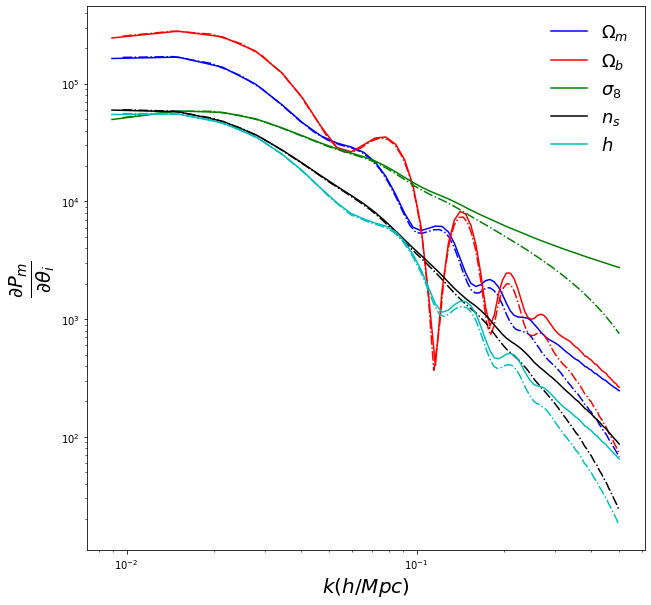

In [282]:
colors = ['b', 'r', 'g', 'k', 'c']
paramsQil = [r'$\Omega_m$', r'$\Omega_b$', r'$\sigma_8$', r'$n_s$', r'$h$']
plt.figure('der_test', figsize=(10, 10))
for ii in range(5):
#for ii in range(1):    
    plt.loglog(k[irange], np.absolute(Pdertot[:,ii]), linestyle='-.', color=colors[ii])
    plt.loglog(khigh[irangehigh], np.absolute(Pdertothigh[:,ii]), color=colors[ii], label=paramsQil[ii])
    #plt.loglog(, np.absolute(Pdertot[:,ii]), linestyle='-.', color=colors[ii])
    #plt.loglog(khigh[irangehigh], np.absolute(Pdertothigh[:,ii]), color=colors[ii])   
plt.legend(loc="best", fontsize=18, frameon=False)  
plt.xlabel(r"$k(h/Mpc)$",fontsize=20)
plt.ylabel(r"$\frac{\partial P_m}{\partial \theta_i}$",fontsize=28)

In [155]:
cosmoQiwst = ['Omp','Omm','Ob2p','Ob2m','s8p','s8m','nsp','nsm','hp','hm']
cosmoQiwst2 = ['Om_p','Om_m','Ob2_p','Ob2_m','s8_p','s8_m','ns_p','ns_m','h_p','h_m']

In [156]:
for idd in cosmoQiwst:
 locals()['sisotropicRSD_'+str(idd)] = np.loadtxt('/Users/gev866/Downloads/s12mean'+str(idd)+'Quij256J5L2.txt')
 locals()['sisotropic2D_'+str(idd)] = np.loadtxt('/Users/gev866/Downloads/s12mean'+str(idd)+'Quij2562DJ8L8')
   

In [157]:
    
for idd in cosmoQiwst2:    
    locals()['sisotropic2Ddec_'+str(idd)] = np.loadtxt('/Users/gev866/Downloads/s12mean'+str(idd)+'Quij2562DJ8L8decorr.txt')

In [158]:
#Same for WST coefficients
for i in range(nQi):
 #print (cosmoid[2*i+1]) 
 #print (locals()['Pk0_'+str(cosmoid[2*i+1])]) sisotropicRSD_
 if (i==0):
  Sdertot = (locals()['sisotropicRSD_'+str(cosmoQiwst[2*i])]-locals()['sisotropicRSD_'+str(cosmoQiwst[2*i+1])])/fidstepsQi[i]
 else:
  Sderint =  (locals()['sisotropicRSD_'+str(cosmoQiwst[2*i])]-locals()['sisotropicRSD_'+str(cosmoQiwst[2*i+1])])/fidstepsQi[i]    
  Sdertot = np.vstack((Sdertot,Sderint))      
 

Sdertot = Sdertot.T

In [159]:
#Same for WST 2D coefficients
for i in range(nQi):

 if (i==0):
  Sdertot2D = (locals()['sisotropic2D_'+str(cosmoQiwst[2*i])]-locals()['sisotropic2D_'+str(cosmoQiwst[2*i+1])])/fidstepsQi[i]
 else:
  Sderint2D =  (locals()['sisotropic2D_'+str(cosmoQiwst[2*i])]-locals()['sisotropic2D_'+str(cosmoQiwst[2*i+1])])/fidstepsQi[i]    
  Sdertot2D = np.vstack((Sdertot2D,Sderint2D))      
 

Sdertot2D = Sdertot2D.T

In [160]:
#Same for WST 2D coefficients
for i in range(nQi):

 if (i==0):
  Sdertot2Ddec = (locals()['sisotropic2Ddec_'+str(cosmoQiwst2[2*i])]-locals()['sisotropic2Ddec_'+str(cosmoQiwst2[2*i+1])])/fidstepsQi[i]
 else:
  Sderint2Ddec =  (locals()['sisotropic2Ddec_'+str(cosmoQiwst2[2*i])]-locals()['sisotropic2Ddec_'+str(cosmoQiwst2[2*i+1])])/fidstepsQi[i]    
  Sdertot2Ddec = np.vstack((Sdertot2Ddec,Sderint2Ddec))      
 

Sdertot2Ddec = Sdertot2Ddec.T

In [161]:
covs12fid1000 = np.loadtxt('/Users/gev866/Downloads/s12covfidQuij256J5L2.txt')
covs12fid2000 = np.loadtxt('/Users/gev866/Downloads/s12fidcov2000256J5L2.txt')
covs12fid15000 = np.loadtxt('/Users/gev866/Downloads/s12fidcov15000256J5L2.txt')

covs12fid100002D = np.loadtxt('/Users/gev866/Downloads/s12fidcov100002562DJ8L8.txt')
covs12fid150002D = np.loadtxt('/Users/gev866/Downloads/s12fidcov150002562DJ8L8.txt')
covs12fid20002D = np.loadtxt('/Users/gev866/Downloads/s12fidcov20002562DJ8L8.txt')
covs12fid150002Ddec = np.loadtxt('/Users/gev866/Downloads/s12fidcov150002562DJ8L8decorr.txt')

In [162]:
Fwst = np.zeros([nQi,nQi])
#Invert Pk0 covariance matrix to use
#cov_mat = Pkcov[0: np.array(irange)[0][-1] + 1, 0: np.array(irange)[0][-1] + 1]
#coeffind = s12fidcov.shape[0]
coeffind = covs12fid2000.shape[0]
#coeffind = 6

#cov_mat = covs12fid2000
cov_mat = covs12fid15000
#cov_mat = covJ5L2jack
#cov_mat = s12fidcov729comb
#cov_mat = s12fidcov729_0
#cov_mat = (9**3-1)*(np.cov(s12fidmat.T, bias=True))
#cov_mat *= ((25-23-2)/(25-1))
#invcov = np.linalg.inv(cov_mat)
#invcov = np.linalg.inv(cov_mat)*((10**3-coeffind-2)/(10**3-1))
invcov = np.linalg.inv(cov_mat)*((15000-coeffind-2)/(15000-1))
#invcov = np.linalg.inv(cov_mat)*((4**3-coeffind-2)/(4**3-1))
#invcov = np.linalg.inv(cov_mat)*((24-coeffind-2)/(24-1))
#Now create and populate Fisher matrix
for ii in range(nQi):
 for jj in range(nQi):
  #Fwst[ii,jj] = np.dot(Sdertot[0:coeffind,ii].flatten(),np.dot(invcov,Sdertot[0:coeffind,jj].flatten()))
  #Fwst[ii,jj] = np.dot(Sdertot[0:coeffind,ii].flatten(),np.dot(invcov[0:coeffind,0:coeffind],Sdertot[0:coeffind,jj].flatten()))
  #Fwst[ii,jj] = np.dot(Sdertotdec[0:coeffind,ii].flatten(),np.dot(invcov[0:coeffind,0:coeffind],Sdertotdec[0:coeffind,jj].flatten()))
  Fwst[ii,jj] = np.dot(Sdertot[0:coeffind,ii].flatten(),np.dot(invcov[0:coeffind,0:coeffind],Sdertot[0:coeffind,jj].flatten()))

In [163]:
Fwst2D = np.zeros([nQi,nQi])

coeffind2D = covs12fid150002D.shape[0]
#coeffind = 6

#cov_mat2D = covs12fid20002D
cov_mat2D = covs12fid150002D

invcov2D = np.linalg.inv(cov_mat2D)*((15000-coeffind2D-2)/(15000-1))

for ii in range(nQi):
 for jj in range(nQi):

  Fwst2D[ii,jj] = np.dot(Sdertot2D[0:coeffind2D,ii].flatten(),np.dot(invcov2D[0:coeffind2D,0:coeffind2D],Sdertot2D[0:coeffind2D,jj].flatten()))

In [164]:
Fwst2Ddec = np.zeros([nQi,nQi])

coeffind2Ddec = covs12fid150002Ddec.shape[0]
#coeffind = 6

#cov_mat2D = covs12fid20002D
cov_mat2Ddec = covs12fid150002Ddec

invcov2Ddec = np.linalg.inv(cov_mat2Ddec)*((15000-coeffind2Ddec-2)/(15000-1))

for ii in range(nQi):
 for jj in range(nQi):

  Fwst2Ddec[ii,jj] = np.dot(Sdertot2Ddec[0:coeffind2Ddec,ii].flatten(),np.dot(invcov2Ddec[0:coeffind2Ddec,0:coeffind2Ddec],Sdertot2Ddec[0:coeffind2Ddec,jj].flatten()))

In [165]:
np.sqrt(np.diag(np.linalg.inv(Fwst)))

array([0.05604359, 0.03052334, 0.00283791, 0.09069245, 0.2911225 ])

In [166]:
np.sqrt(np.diag(np.linalg.inv(Fwst)))

array([0.05604359, 0.03052334, 0.00283791, 0.09069245, 0.2911225 ])

In [167]:
np.sqrt(np.diag(np.linalg.inv(Fwst2D)))

array([0.39652397, 0.24537429, 0.0094245 , 0.98655399, 2.7105516 ])

In [168]:
np.sqrt(np.diag(np.linalg.inv(Fwst2Ddec)))

array([0.39634972, 0.24499543, 0.0094201 , 0.98473868, 2.70622789])

In [169]:
paramsQi = [r'\Omega_m', r'\Omega_b', r'\sigma_8', r'n_s', r'h']

In [242]:
FisherPkQi = FisherMatrix(FPk,paramsQi)
FisherPkQi4 = FisherMatrix(FPk4,paramsQi)
FisherPkQi3 = FisherMatrix(FPk3,paramsQi)
FisherPkQi2 = FisherMatrix(FPk2,paramsQi)
FisherPkQi1 = FisherMatrix(FPk1,paramsQi)
FisherwstQi = FisherMatrix(Fwst,paramsQi)
FisherPkQi0 = FisherMatrix(FPk0,paramsQi)
Fisherwst2DQi = FisherMatrix(Fwst2D,paramsQi)
Fisherwst2DQidec = FisherMatrix(Fwst2Ddec,paramsQi)
FisherPkQihigh = FisherMatrix(FPkhigh,paramsQi)
FisherPkQihigh4 = FisherMatrix(FPkhigh4,paramsQi)
FisherPkQihigh3 = FisherMatrix(FPkhigh3,paramsQi)
FisherPkQihigh2 = FisherMatrix(FPkhigh2,paramsQi)
FisherPkQihigh1 = FisherMatrix(FPkhigh1,paramsQi)
FisherPkQihigh0 = FisherMatrix(FPkhigh0,paramsQi)

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/orphics/stats.py:244: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [243]:
FisherPkQi

,\Omega_m,\Omega_b,\sigma_8,n_s,h
\Omega_m,58057.162473,-82825.612328,4379.966710,26181.405534,20079.343458
\Omega_b,-82825.612328,179795.224897,-18076.320811,-40170.305720,-35792.247977
\sigma_8,4379.966710,-18076.320811,226935.317361,1608.561680,3004.970750
n_s,26181.405534,-40170.305720,1608.561680,12822.311774,9898.921443
h,20079.343458,-35792.247977,3004.970750,9898.921443,8148.621776


In [244]:
FisherPkQihigh

,\Omega_m,\Omega_b,\sigma_8,n_s,h
\Omega_m,56853.553785,-80323.190309,3977.290669,25577.211560,19581.593693
\Omega_b,-80323.190309,173873.365228,-15727.974054,-38939.762531,-34696.568027
\sigma_8,3977.290669,-15727.974054,224449.871505,1330.661917,2614.499878
n_s,25577.211560,-38939.762531,1330.661917,12525.093225,9649.488112
h,19581.593693,-34696.568027,2614.499878,9649.488112,7933.917861


In [245]:
wdictQi = {r'\Omega_m' : fidparamsQi[0], r'\Omega_b' : fidparamsQi[1],r'\sigma_8': fidparamsQi[2], r'n_s' : fidparamsQi[3],  r'h' : fidparamsQi[4]}

In [246]:
labelcomp=[r'Pk $k_{max}=0.2$', r'WST 3D']
labelcomp2D=[r'WST 2D', r'WST 2D Decorr.', r'Pk $k_{max}=0.2$', r'WST 3D']
Fishercomp=[FisherPkQi2, FisherwstQi]
Fishercomp2D=[Fisherwst2DQi, Fisherwst2DQidec, FisherPkQi2, FisherwstQi]
labelQi=[r'Pk $k_{max}=0.1$',r'Pk $k_{max}=0.2$',r'Pk $k_{max}=0.3$',r'Pk $k_{max}=0.4$',r'Pk $k_{max}=0.5$']
FisherQi=[FisherPkQi1,FisherPkQi2,FisherPkQi3,FisherPkQi4,FisherPkQi]
FisherQihigh=[FisherPkQihigh1,FisherPkQihigh2,FisherPkQihigh3,FisherPkQihigh4,FisherPkQihigh]

In [247]:
labelQi

['Pk $k_{max}=0.1$',
 'Pk $k_{max}=0.2$',
 'Pk $k_{max}=0.3$',
 'Pk $k_{max}=0.4$',
 'Pk $k_{max}=0.5$']

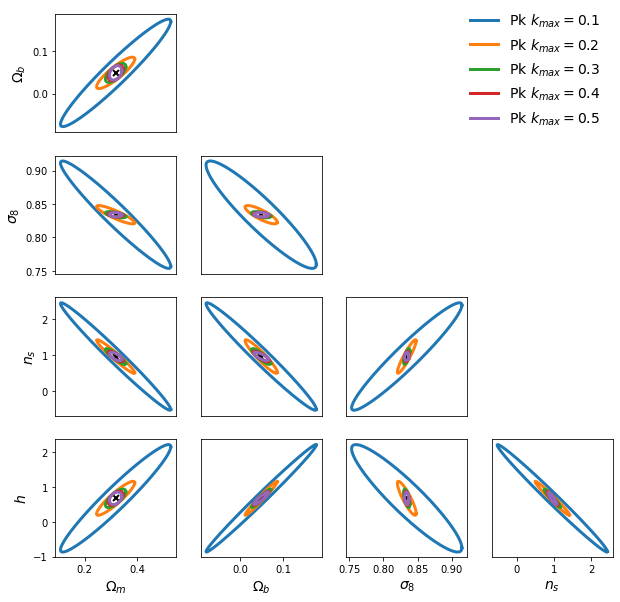

In [248]:
corner_plot(FisherQihigh, labelQi, wdictQi, paramsQi, confidence_level=0.683)

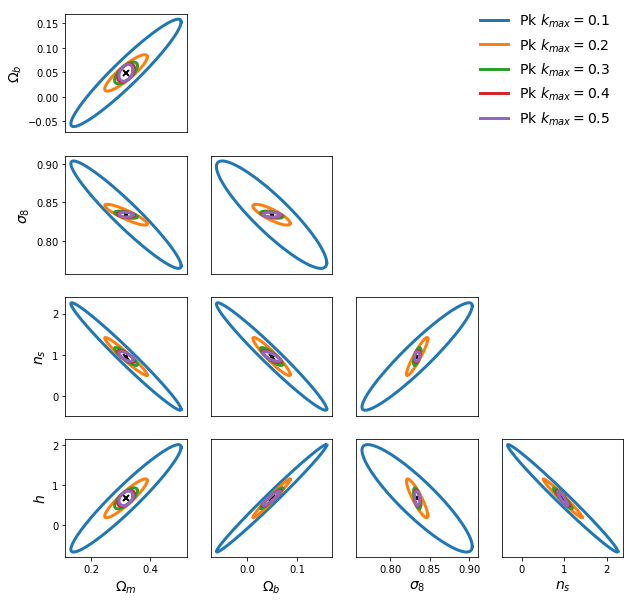

In [197]:
corner_plot(FisherQi, labelQi, wdictQi, paramsQi, confidence_level=0.683)

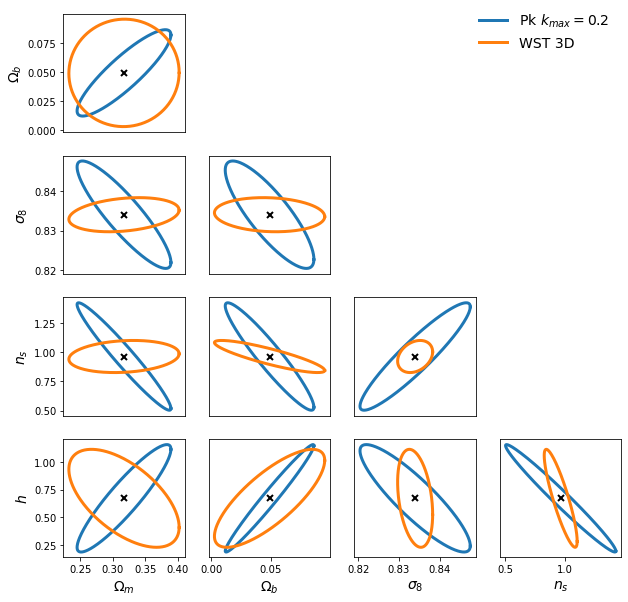

In [199]:
corner_plot(Fishercomp, labelcomp, wdictQi, paramsQi, confidence_level=0.683)

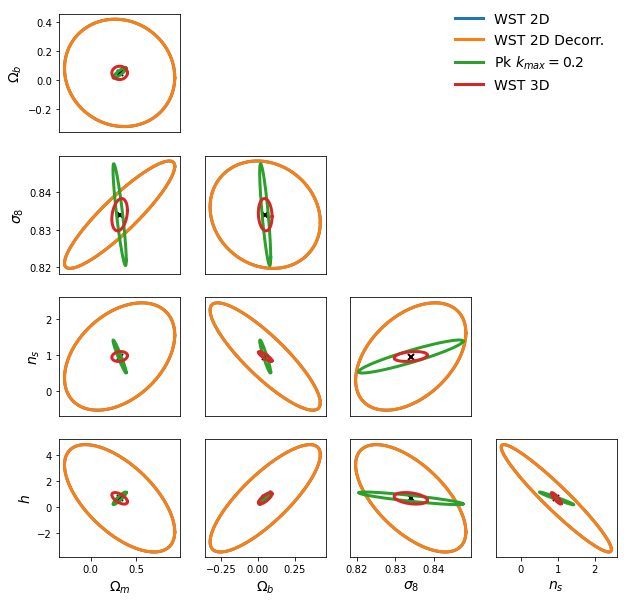

In [200]:
corner_plot(Fishercomp2D, labelcomp2D, wdictQi, paramsQi, confidence_level=0.683)

In [201]:
math.pi*1024/2000.0

1.6084954386379742

In [252]:
FPk5 = FPk
FPkhigh5 = FPkhigh

In [253]:
Errormat = np.zeros([6,5])
Errormathigh = np.zeros([6,5])

In [254]:
for i in range(6):
    Errormat[i,:] = np.sqrt(np.diag(np.linalg.inv(locals()['FPk'+str(i)])))
    Errormathigh[i,:] = np.sqrt(np.diag(np.linalg.inv(locals()['FPkhigh'+str(i)])))

In [205]:
kk = np.array([0.05,0.1,0.2,0.3,0.4,0.5])

In [206]:
#Error1.shape

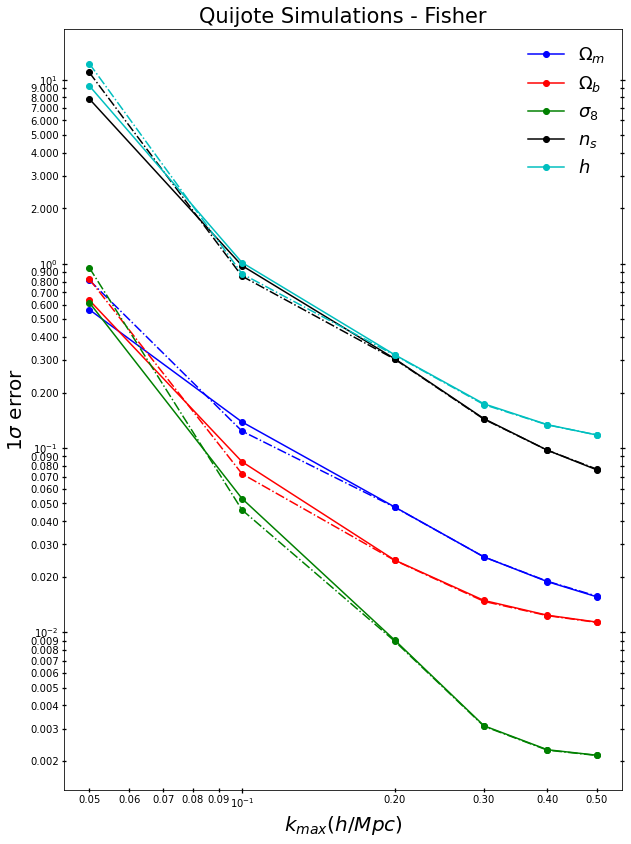

In [284]:
plt.figure('Errvsk', figsize=(10, 14) )
for i in range(5):
 plt.loglog(kk, Errormat[:,i], marker='o', linestyle='-.',color=colors[i])
 plt.loglog(kk, Errormathigh[:,i], marker='o', label=paramsQil[i], linestyle='-',color=colors[i])
#from matplotlib.ticker import StrMethodFormatter
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.title('Quijote Simulations - Fisher', fontsize=21)
plt.xlabel(r"$k_{max} (h/Mpc)$",fontsize=20)
plt.ylabel(r"$1\sigma$ error",fontsize=20)
plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
plt.tick_params(which='both',width=1.3)
from matplotlib.ticker import FormatStrFormatter

ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='x', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.3f"))
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':18})

In [404]:
fidparamsQi

array([0.3175, 0.049 , 0.834 , 0.9624, 0.6711])

In [478]:
np.amax(np.abs(covs12fid15000/covs12fid1000-1))

0.4702859107053896

In [483]:
np.sqrt(np.diag(covs12fid15000)/np.diag(covs12fid1000))

array([1.00118116, 1.01706501, 1.04274095, 1.04318311, 1.00574782,
       1.00008005, 1.00728755, 1.01134441, 1.02359101, 1.02612792,
       1.02535813, 1.02513196, 1.03434698, 1.04031492, 1.03747091,
       1.05507678, 1.06301487, 1.05292928, 1.0299562 , 1.02715731,
       1.00335652])

No handles with labels found to put in legend.
/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


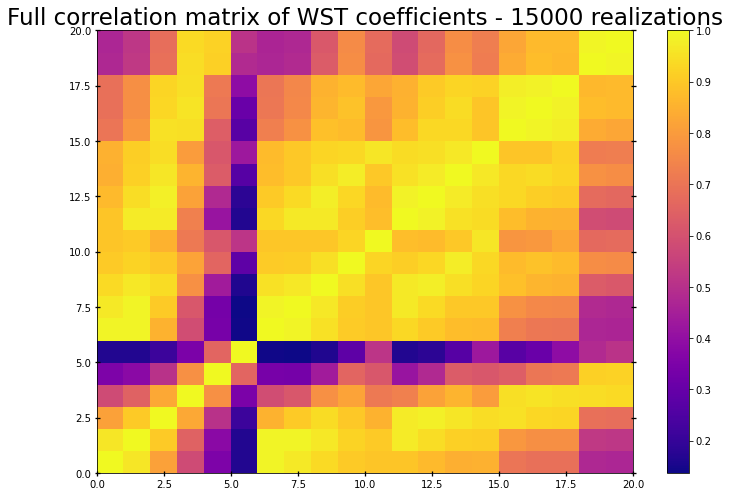

In [471]:
covxx = np.sqrt(np.diag(covs12fid15000))*np.identity(covs12fid15000.shape[0])
invcoxx = np.linalg.inv(covxx)
corr12fid2000 = np.dot(invcoxx,np.dot(covs12fid15000,invcoxx))
def applyPlotStyle19():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 plt.xlim(0, 20)
 plt.ylim(0, 20)
 #plt.ylim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 #plt.xlabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$r (Mpc/h)$",fontsize=18)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})

fig13=plt.figure('CorrFull', figsize=(10, 7) )
ax=fig13.add_subplot(111)
applyPlotStyle19()
ax.set_title('Full correlation matrix of WST coefficients - 15000 realizations', fontsize=23)
pltcov=ax.pcolormesh(np.arange(int((corr12fid2000.shape[0]))),np.arange(int((corr12fid2000.shape[0]))),corr12fid2000, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corrPMGmat_43, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corr_mat2, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,cov_mat2, cmap='plasma')
fig13.colorbar(pltcov, ax=ax)
plt.tight_layout()
plt.show()

In [276]:
irangehighk = np.where(khigh<=1)

No handles with labels found to put in legend.
/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


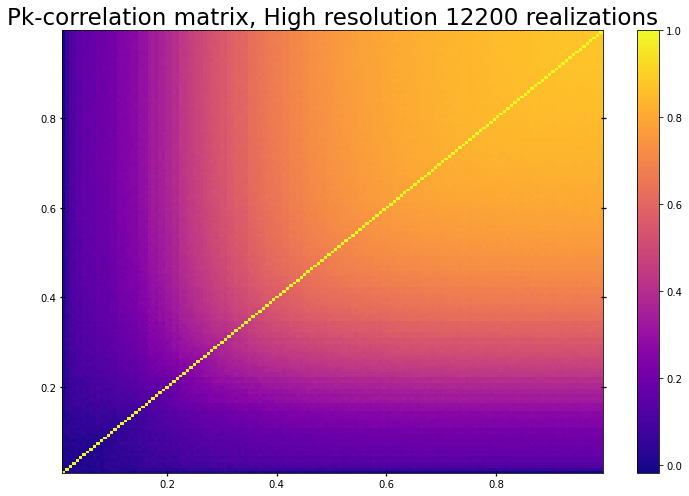

In [278]:
covxxpk = np.sqrt(np.diag(Pkhighcovfid))*np.identity(Pkhighcovfid.shape[0])
invcoxxpk = np.linalg.inv(covxxpk)
corrpkfid12000 = np.dot(invcoxxpk,np.dot(Pkhighcovfid,invcoxxpk))
def applyPlotStyle19():
 plt.tick_params(axis='both',which='major',length=5, left='on', right='on', width=1, direction='inout')
 plt.tick_params(axis='both',which='minor',length=3.2,left='on', right='on', width=1, direction='inout')
 plt.tick_params(which='both',width=1.3)
 plt.grid(True)
 #plt.xscale("log")
 #plt.yscale("log")
 plt.xlim(khigh[irangehighk][0], khigh[irangehighk][-1])
 plt.ylim(khigh[irangehighk][0], khigh[irangehighk][-1])
 #plt.ylim(kvec[0], kvec[kvec.shape[0]-1])
 #plt.ylabel(r"$\frac{P_{MG}}{P_{\Lambda CDM}}$",fontsize=18)
 #plt.xlabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$k (h/Mpc)$",fontsize=20)
 #plt.ylabel(r"$r (Mpc/h)$",fontsize=18)
 plt.legend(loc="best", frameon=False, numpoints=1, prop={'size':12})

fig14=plt.figure('Pk-correlation matrix, 12000 realizations', figsize=(10, 7) )
ax=fig14.add_subplot(111)
applyPlotStyle19()
ax.set_title('Pk-correlation matrix, High resolution 12200 realizations', fontsize=23)
pltcov=ax.pcolormesh(khigh[irangehighk],khigh[irangehighk],np.corrcoef(Pkmat.T)[0: np.array(irangehighk)[0][-1] + 1, 0: np.array(irangehighk)[0][-1] + 1], cmap='plasma')
#pltcov=ax.pcolormesh(khigh[irangehighk],khigh[irangehighk],np.cov(Pkmat.T)[0: np.array(irangehighk)[0][-1] + 1, 0: np.array(irangehighk)[0][-1] + 1], cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corrPMGmat_43, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,corr_mat2, cmap='plasma')
#pltcov=ax.pcolormesh(kvec,kvec,cov_mat2, cmap='plasma')
fig13.colorbar(pltcov, ax=ax)
plt.tight_layout()
plt.show()


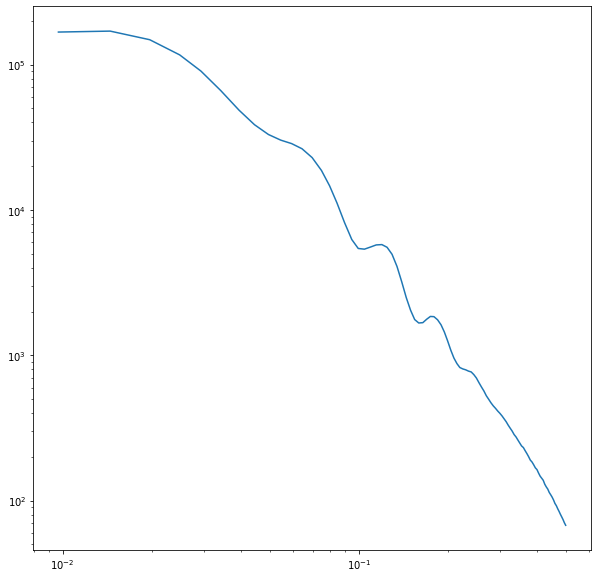

In [407]:
plt.figure('der_test1', figsize=(10, 10))
plt.loglog(k[irange], np.absolute(Pdertot[0:,0]))

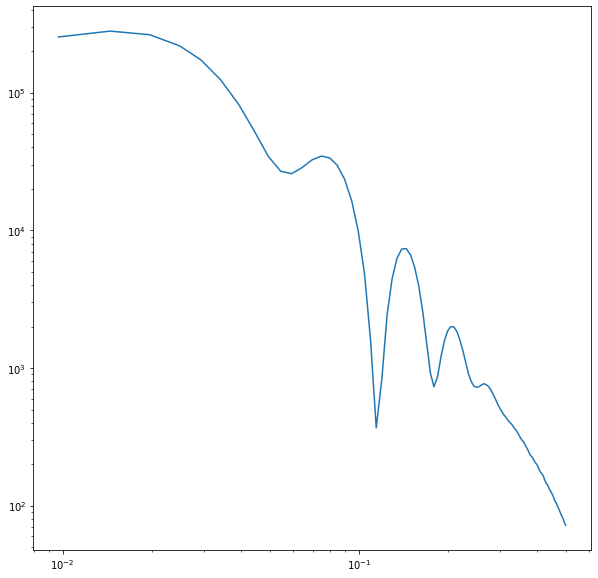

In [614]:
plt.figure('der_test1', figsize=(10, 10))
plt.loglog(k[irange], np.absolute(Pdertot[:,1]))

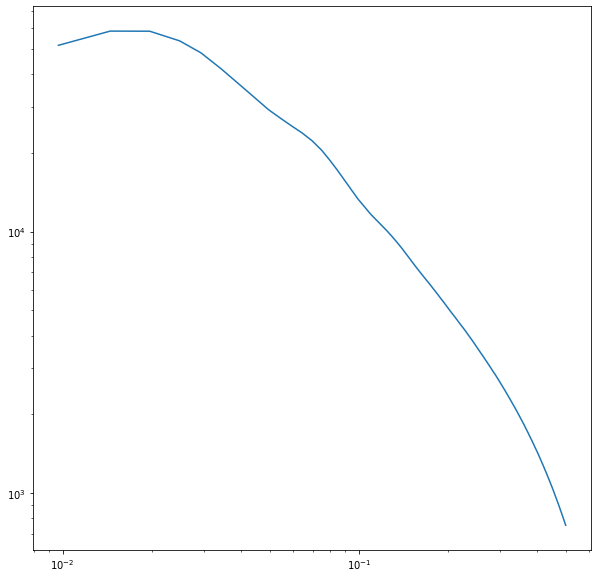

In [409]:
plt.figure('der_test1', figsize=(10, 10))
plt.loglog(k[irange], np.absolute(Pdertot[0:,2]))

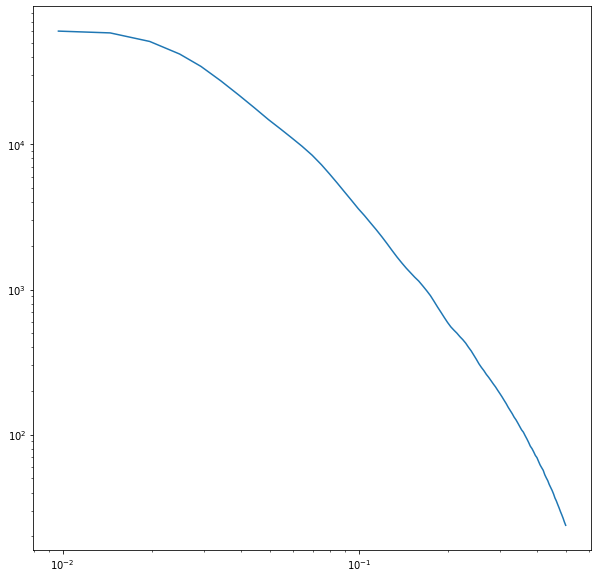

In [410]:
plt.figure('der_test1', figsize=(10, 10))
plt.loglog(k[irange], np.absolute(Pdertot[0:,3]))

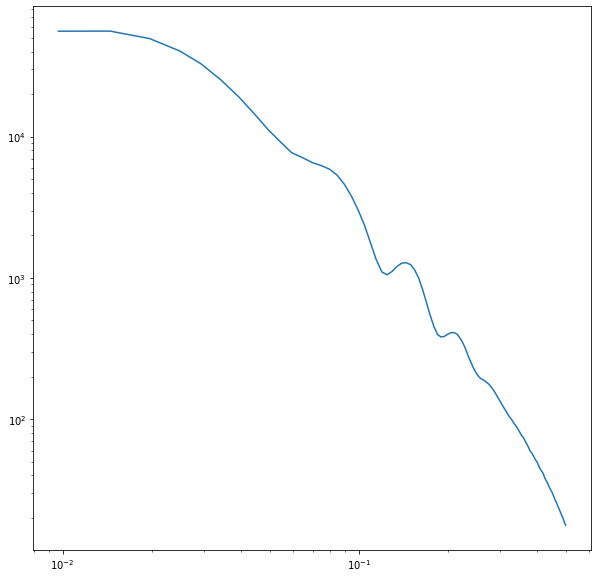

In [411]:
plt.figure('der_test1', figsize=(10, 10))
plt.loglog(k[irange], np.absolute(Pdertot[0:,4]))

In [412]:
ct = 1024/240

In [413]:
print (ct*55.556, ct*166.667, ct*277.778)

237.03893333333332 711.1125333333333 1185.1861333333334


In [414]:
ct*111.111

474.0736

In [415]:
num = np.array([0,1,2])

In [416]:
(2*num+1)*240/6/0.72

array([ 55.55555556, 166.66666667, 277.77777778])

In [417]:
(2*num+1)*1024/6/0.72

array([ 237.03703704,  711.11111111, 1185.18518519])

In [418]:
1024/3/0.72

474.0740740740741

In [446]:
k, Pk = np.loadtxt('/Users/gev866/Downloads/Pk_m_z=0.txt', unpack=True)
k2048, Pk2048 = np.loadtxt('/Users/gev866/Downloads/Pk_m_2048_z=0.txt', unpack=True)

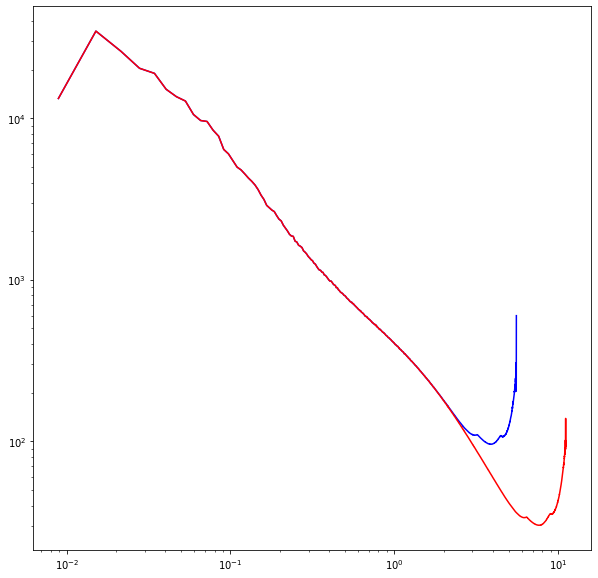

In [451]:
plt.figure('Pk_test1', figsize=(10, 10))
plt.loglog(k, Pk, color='b')
plt.loglog(k2048, Pk2048, color='r')

In [465]:
np.where(k<=0.8)[0].shape

(126,)